# Comparison of Original IForestASD, SADWIN IFA, PADWIN IFA, and NDKSWIN

L'objectif est de voir comment les 4 méthodes se comportent avec différents jeux de données.
* SAWIN IFA (Scores based ADWIN on IForestASD) utilise le score des données sur la base du modèle créé avec IForest ASD dans les fenêtres précédentes. Ce score est utilisé par ADWIN pour vérifier si le modèle drift pour pas. Une fois le drift détecté, le modèle est mis à jour sur la base de la fenêtre courante et l'ancien modèle est totalement supprimé.
* PAWIN IFA (Prediction based ADWIN on IForestASD) utilise la classification des données sur la base du modèle créé avec IForest ASD dans les fenêtres précédentes. Cette classification est utilisée par ADWIN pour vérifier si le modèle drift pour pas. Une fois le drift détecté, le modèle est mis à jour sur la base de la fenêtre courante et l'ancien modèle est totalement supprimé.
* NDKSWIN IFA (N-Dimensional KSWIN on IForestASD) utilise les données de la fenêtre courante pour détecter si elles drift sur au moins une colonne. NDKSWIN est une adaptation de KSWIN de scikit-multiflow pour les données à n dimensions. Une fois le drift détecté, le modèle est mis à jour sur la base de la fenêtre courante et l'ancien modèle est totalement supprimé.

## Install skmultiflow if needed
You need to install git

In [1]:
#print("scikit-multiflow package installation")
#!pip install -U git+https://github.com/scikit-multiflow/scikit-multiflow

In [2]:
try:
    import skmultiflow
except ImportError as e:
    print("scikit-multiflow package installation")
    !pip install -U git+https://github.com/scikit-multiflow/scikit-multiflow

## Importations and configurations

In [3]:
%matplotlib notebook
import matplotlib as plt
plt.interactive(True)
from source import functions
func = functions.Comparison()
import datetime
#from skmultiflow.data import AnomalySineGenerator

## General parameters for the evaluation

In [4]:
#************************ Execution settings *******************************
window_sizes = [50, 100, 250]
n_estimators = [20, 30]
#window_sizes = [50, 100]
#n_estimators = [20, 30]
#window = 100 # Number of sample in one window, window size.
#n_estimator = 30 # Number of itree in the random forest
execution_number = 1 # Number of execution because of the random character of IForest
anomaly_threshold = 0.5 # Anomaly threshold to decide which is anomaly or not
max_sample = 1000 # Total size of data to examine (windows number = max_sample/window)
n_wait = max_sample # The evaluation step size
# Used metric in the evaluation. Attention to use the metrics availlable in skmultiflow
metrics=['accuracy', 'f1', 'precision', 'recall', 'true_vs_predicted', 'kappa', 'kappa_m', 'running_time', 'model_size']

#************************ Stream data settings *******************************
window_save_size = 100
window_number = round((max_sample/window_save_size),0) # The number of window to save on .csv file

# Parameters for NDWSIN IFA
alpha=0.01
n_dimensions=2 # Number of dimensions to use for the test of the drift concept
n_tested_samples=0.1 # Percentage of data to pick in the window to test the drift concept
fixed_checked_dimension = False # IF False, dimension will be choose randomly, if not on the 
fixed_checked_sample=False

In [5]:
import numpy as np
t = [range(3)]
print(t)

[range(0, 3)]


## Execution Function

In [6]:
def execute_comparision():
    for window in window_sizes:
        for n_estimator in n_estimators:
            print("")
            print("******************************** Window = "+str(window)+" and n_estimator = "+str(n_estimator)+" ********************************")
            func.run_IForestASDs_comparison(execution_number=execution_number, stream=stream, stream_n_features=stream.n_features, window = window, 
                             estimators = n_estimator, anomaly = anomaly_threshold, drift_rate = drift_rate, 
                             result_folder=test_name, max_sample=max_sample, n_wait=n_wait, metrics=metrics,
                             #n_estimators_updated=n_estimators_updated, updated_randomly=updated_randomly,
                            alpha=alpha, n_dimensions=n_dimensions, n_tested_samples=n_tested_samples,
                            fixed_checked_dimension = fixed_checked_dimension, fixed_checked_sample=fixed_checked_sample)
    
    directory_path = 'results/'+str(test_name)
    func.merge_file2(folder_path=directory_path, output_file = 'output.csv',skiprows=(4 + 4))

## Applied On Simple Stream Dataset
### Idea and waitting results
### Results
#### Model updating
#### Method performances

### Summary


******************************** Window = 50 and n_estimator = 20 ********************************
*************************************** Execution N° 0**********************************


<IPython.core.display.Javascript object>


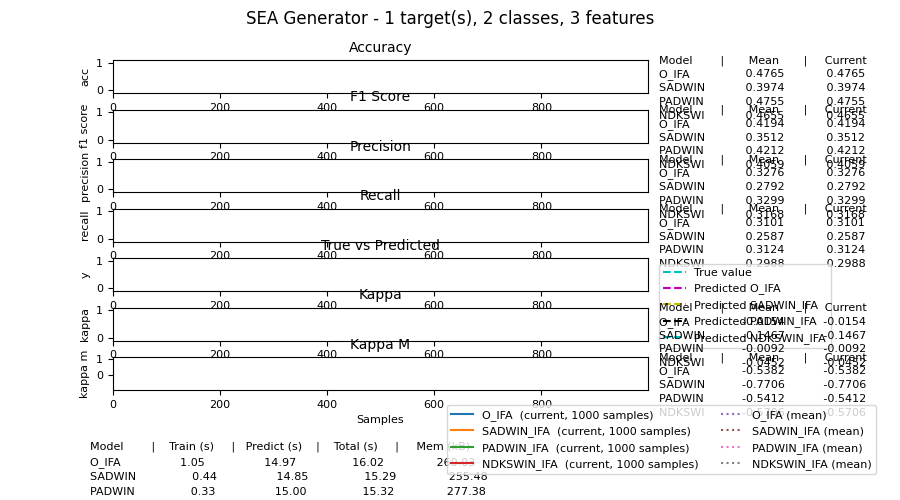

Prequential Evaluation
Evaluating 1 target(s).
Pre-training on 1 sample(s).
Evaluating...
 #------------------- [5%] [0.01s]

/Users/maurrastogbe/opt/anaconda3/lib/python3.7/site-packages/skmultiflow/visualization/evaluation_visualizer.py:340: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self.fig.tight_layout(rect=[0, .04, 1, 0.98], pad=2.6, w_pad=0.4, h_pad=1.0)



The model was updated by training a new iForest with the version : AnomalyRate
 ##------------------ [10%] [3.46s]
The model was updated by training a new iForest with the version : AnomalyRate

The model was updated by training a new iForest with the version : SADWIN


/Users/maurrastogbe/opt/anaconda3/lib/python3.7/site-packages/skmultiflow/drift_detection/adwin.py:372: RuntimeWarning: invalid value encountered in sqrt
  epsilon = np.sqrt(2 * m * v * dd) + 1. * 2 / 3 * dd * m


 ###----------------- [15%] [6.93s]
The model was updated by training a new iForest with the version : AnomalyRate
 ####---------------- [20%] [9.99s]
The model was updated by training a new iForest with the version : AnomalyRate

The model was updated by training a new iForest with the version : NDKSWIN
 #####--------------- [25%] [13.30s]
The model was updated by training a new iForest with the version : AnomalyRate

The model was updated by training a new iForest with the version : NDKSWIN
 ######-------------- [30%] [16.76s]
The model was updated by training a new iForest with the version : AnomalyRate

The model was updated by training a new iForest with the version : NDKSWIN
 #######------------- [35%] [20.01s]
The model was updated by training a new iForest with the version : AnomalyRate

The model was updated by training a new iForest with the version : NDKSWIN
 ########------------ [40%] [23.10s]
The model was updated by training a new iForest with the version : AnomalyRate

T

<IPython.core.display.Javascript object>


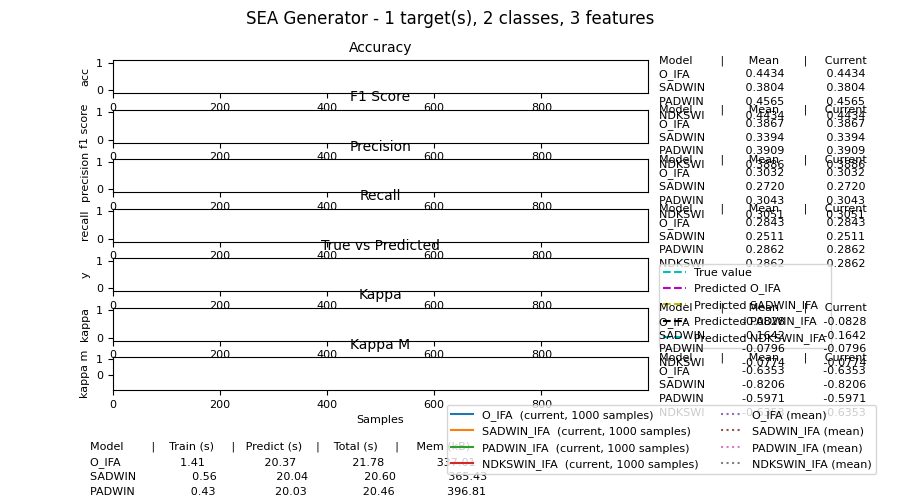

Prequential Evaluation
Evaluating 1 target(s).
Pre-training on 1 sample(s).
Evaluating...
 #------------------- [5%] [0.01s]

/Users/maurrastogbe/opt/anaconda3/lib/python3.7/site-packages/skmultiflow/visualization/evaluation_visualizer.py:340: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self.fig.tight_layout(rect=[0, .04, 1, 0.98], pad=2.6, w_pad=0.4, h_pad=1.0)



The model was updated by training a new iForest with the version : AnomalyRate
 ##------------------ [10%] [4.75s]
The model was updated by training a new iForest with the version : AnomalyRate

The model was updated by training a new iForest with the version : SADWIN


/Users/maurrastogbe/opt/anaconda3/lib/python3.7/site-packages/skmultiflow/drift_detection/adwin.py:372: RuntimeWarning: invalid value encountered in sqrt
  epsilon = np.sqrt(2 * m * v * dd) + 1. * 2 / 3 * dd * m


 ###----------------- [15%] [9.21s]
The model was updated by training a new iForest with the version : AnomalyRate
 ####---------------- [20%] [13.65s]
The model was updated by training a new iForest with the version : AnomalyRate

The model was updated by training a new iForest with the version : NDKSWIN
 #####--------------- [25%] [18.17s]
The model was updated by training a new iForest with the version : AnomalyRate

The model was updated by training a new iForest with the version : NDKSWIN
 ######-------------- [30%] [22.87s]
The model was updated by training a new iForest with the version : AnomalyRate

The model was updated by training a new iForest with the version : NDKSWIN
 #######------------- [35%] [27.21s]
The model was updated by training a new iForest with the version : AnomalyRate

The model was updated by training a new iForest with the version : NDKSWIN
 ########------------ [40%] [31.51s]
The model was updated by training a new iForest with the version : AnomalyRate



<IPython.core.display.Javascript object>


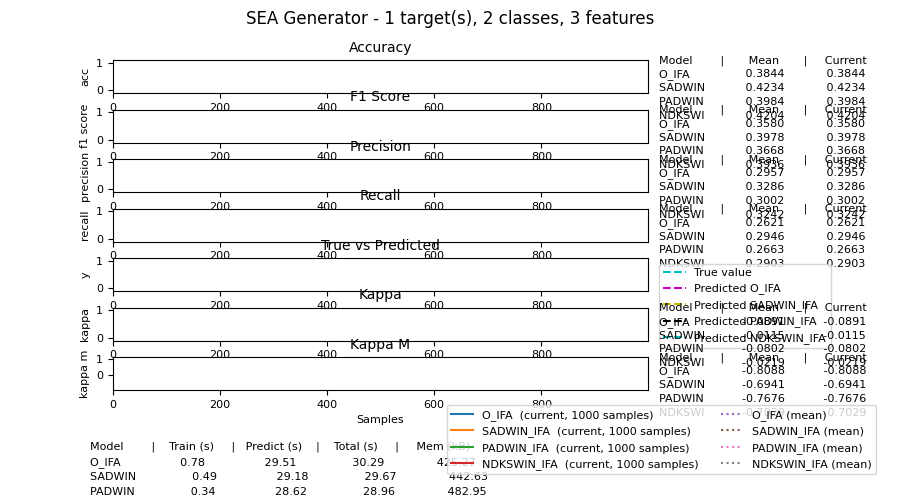

Prequential Evaluation
Evaluating 1 target(s).
Pre-training on 1 sample(s).
Evaluating...
 ##------------------ [10%] [0.02s]

/Users/maurrastogbe/opt/anaconda3/lib/python3.7/site-packages/skmultiflow/visualization/evaluation_visualizer.py:340: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self.fig.tight_layout(rect=[0, .04, 1, 0.98], pad=2.6, w_pad=0.4, h_pad=1.0)



The model was updated by training a new iForest with the version : AnomalyRate


/Users/maurrastogbe/opt/anaconda3/lib/python3.7/site-packages/skmultiflow/drift_detection/adwin.py:372: RuntimeWarning: invalid value encountered in sqrt
  epsilon = np.sqrt(2 * m * v * dd) + 1. * 2 / 3 * dd * m


 ####---------------- [20%] [14.08s]
The model was updated by training a new iForest with the version : AnomalyRate

The model was updated by training a new iForest with the version : NDKSWIN
 ######-------------- [30%] [27.11s]
The model was updated by training a new iForest with the version : AnomalyRate

The model was updated by training a new iForest with the version : NDKSWIN
 ########------------ [40%] [39.86s]
The model was updated by training a new iForest with the version : AnomalyRate

The model was updated by training a new iForest with the version : NDKSWIN
 ##########---------- [50%] [52.47s]
The model was updated by training a new iForest with the version : AnomalyRate

The model was updated by training a new iForest with the version : NDKSWIN
 ############-------- [60%] [65.17s]
The model was updated by training a new iForest with the version : AnomalyRate

The model was updated by training a new iForest with the version : NDKSWIN
 ##############------ [70%] [78.94s]
The

<IPython.core.display.Javascript object>


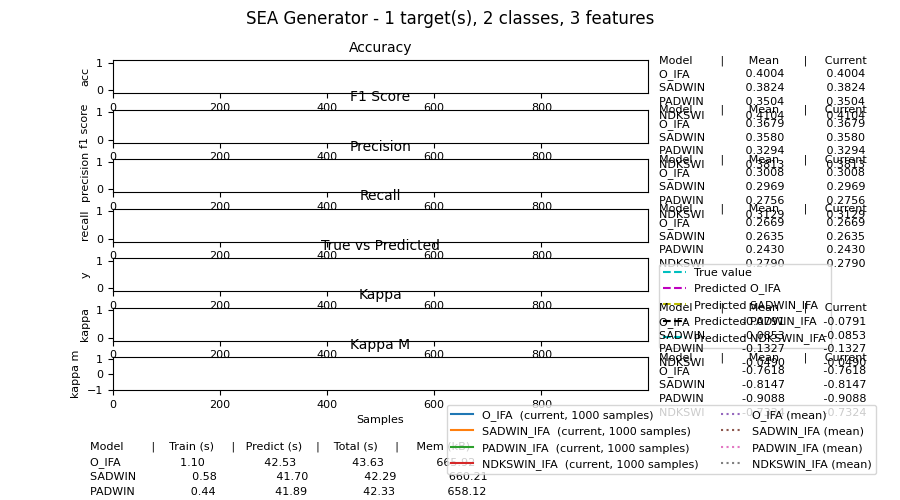

Prequential Evaluation
Evaluating 1 target(s).
Pre-training on 1 sample(s).
Evaluating...
 ##------------------ [10%] [0.02s]

/Users/maurrastogbe/opt/anaconda3/lib/python3.7/site-packages/skmultiflow/visualization/evaluation_visualizer.py:340: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self.fig.tight_layout(rect=[0, .04, 1, 0.98], pad=2.6, w_pad=0.4, h_pad=1.0)



The model was updated by training a new iForest with the version : AnomalyRate


/Users/maurrastogbe/opt/anaconda3/lib/python3.7/site-packages/skmultiflow/drift_detection/adwin.py:372: RuntimeWarning: invalid value encountered in sqrt
  epsilon = np.sqrt(2 * m * v * dd) + 1. * 2 / 3 * dd * m


 ####---------------- [20%] [22.30s]
The model was updated by training a new iForest with the version : AnomalyRate
 ######-------------- [30%] [41.29s]
The model was updated by training a new iForest with the version : AnomalyRate

The model was updated by training a new iForest with the version : NDKSWIN
 ########------------ [40%] [60.69s]
The model was updated by training a new iForest with the version : AnomalyRate

The model was updated by training a new iForest with the version : NDKSWIN
 ##########---------- [50%] [80.75s]
The model was updated by training a new iForest with the version : AnomalyRate

The model was updated by training a new iForest with the version : NDKSWIN
 ############-------- [60%] [99.00s]
The model was updated by training a new iForest with the version : AnomalyRate

The model was updated by training a new iForest with the version : NDKSWIN
 ##############------ [70%] [117.38s]
The model was updated by training a new iForest with the version : AnomalyRate

<IPython.core.display.Javascript object>


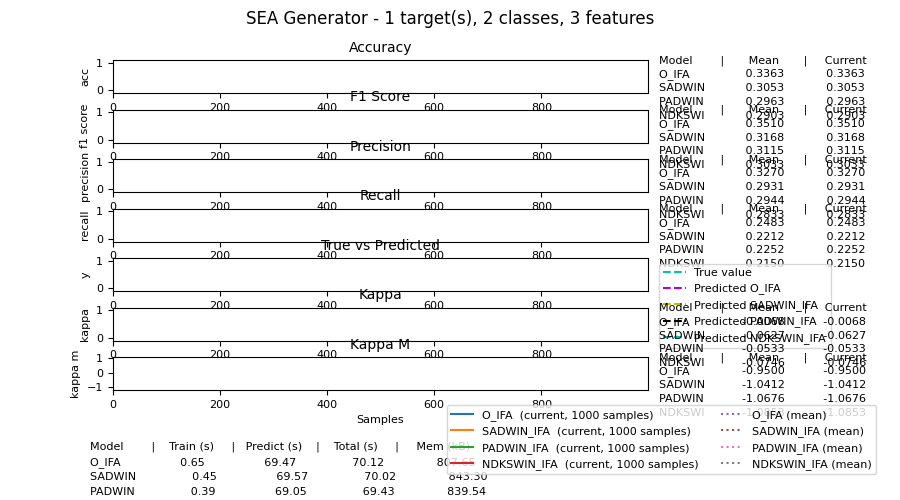

Prequential Evaluation
Evaluating 1 target(s).
Pre-training on 1 sample(s).
Evaluating...
 #####--------------- [25%] [0.09s]

/Users/maurrastogbe/opt/anaconda3/lib/python3.7/site-packages/skmultiflow/visualization/evaluation_visualizer.py:340: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self.fig.tight_layout(rect=[0, .04, 1, 0.98], pad=2.6, w_pad=0.4, h_pad=1.0)



The model was updated by training a new iForest with the version : AnomalyRate


/Users/maurrastogbe/opt/anaconda3/lib/python3.7/site-packages/skmultiflow/drift_detection/adwin.py:372: RuntimeWarning: invalid value encountered in sqrt
  epsilon = np.sqrt(2 * m * v * dd) + 1. * 2 / 3 * dd * m


 ##########---------- [50%] [96.67s]
The model was updated by training a new iForest with the version : AnomalyRate
 ###############----- [75%] [190.77s]
The model was updated by training a new iForest with the version : AnomalyRate

The model was updated by training a new iForest with the version : NDKSWIN
 #################### [100%] [279.20s]
Processed samples: 1000
Mean performance:
O_IFA - Accuracy     : 0.3363
O_IFA - Kappa        : -0.0068
O_IFA - Kappa M      : -0.9500
O_IFA - Precision: 0.3270
O_IFA - Recall: 0.2483
O_IFA - F1 score: 0.3510
O_IFA - Training time (s)  : 0.65
O_IFA - Testing time  (s)  : 69.47
O_IFA - Total time    (s)  : 70.12
O_IFA - Size (kB)          : 807.6533
SADWIN_IFA - Accuracy     : 0.3053
SADWIN_IFA - Kappa        : -0.0627
SADWIN_IFA - Kappa M      : -1.0412
SADWIN_IFA - Precision: 0.2931
SADWIN_IFA - Recall: 0.2212
SADWIN_IFA - F1 score: 0.3168
SADWIN_IFA - Training time (s)  : 0.45
SADWIN_IFA - Testing time  (s)  : 69.57
SADWIN_IFA - Total time    

<IPython.core.display.Javascript object>


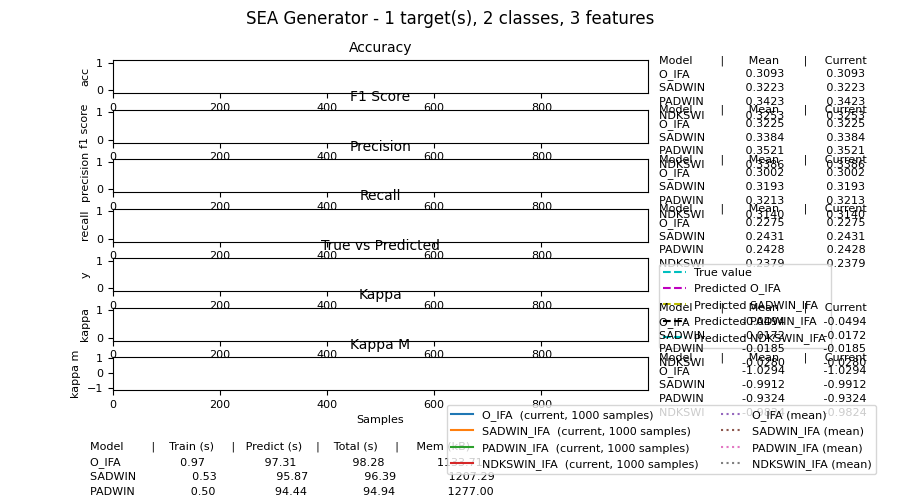

Prequential Evaluation
Evaluating 1 target(s).
Pre-training on 1 sample(s).
Evaluating...
 #####--------------- [25%] [0.06s]

/Users/maurrastogbe/opt/anaconda3/lib/python3.7/site-packages/skmultiflow/visualization/evaluation_visualizer.py:340: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self.fig.tight_layout(rect=[0, .04, 1, 0.98], pad=2.6, w_pad=0.4, h_pad=1.0)



The model was updated by training a new iForest with the version : AnomalyRate


/Users/maurrastogbe/opt/anaconda3/lib/python3.7/site-packages/skmultiflow/drift_detection/adwin.py:372: RuntimeWarning: invalid value encountered in sqrt
  epsilon = np.sqrt(2 * m * v * dd) + 1. * 2 / 3 * dd * m


 ##########---------- [50%] [129.42s]
The model was updated by training a new iForest with the version : AnomalyRate
 ###############----- [75%] [257.80s]
The model was updated by training a new iForest with the version : AnomalyRate
 #################### [100%] [385.64s]
Processed samples: 1000
Mean performance:
O_IFA - Accuracy     : 0.3093
O_IFA - Kappa        : -0.0494
O_IFA - Kappa M      : -1.0294
O_IFA - Precision: 0.3002
O_IFA - Recall: 0.2275
O_IFA - F1 score: 0.3225
O_IFA - Training time (s)  : 0.97
O_IFA - Testing time  (s)  : 97.31
O_IFA - Total time    (s)  : 98.28
O_IFA - Size (kB)          : 1133.7080
SADWIN_IFA - Accuracy     : 0.3223
SADWIN_IFA - Kappa        : -0.0172
SADWIN_IFA - Kappa M      : -0.9912
SADWIN_IFA - Precision: 0.3193
SADWIN_IFA - Recall: 0.2431
SADWIN_IFA - F1 score: 0.3384
SADWIN_IFA - Training time (s)  : 0.53
SADWIN_IFA - Testing time  (s)  : 95.87
SADWIN_IFA - Total time    (s)  : 96.39
SADWIN_IFA - Size (kB)          : 1207.2852
PADWIN_IFA - Accu

In [7]:
dataset_name = "Generator"
test_name = dataset_name+'_'+str(datetime.datetime.now())
drift_rate = 0.1
stream = func.get_dataset(dataset_name=dataset_name, classification_function=0,noise_percentage=0.1, random_state=1)

#func.save_stream_data_generated(stream=stream, window = window_save_size, result_folder=test_name, window_number = window_number)
execute_comparision()

## Applied On Stream data containning anomalies
### Idea and waitting results
The idea of using a stream data with anomalies and without drift is to test both methods on a anomaly environnement.
Normally, SADWIN IForestASD or PADWIN IForestASD method will not update his model (It will be a good result) and it will have better or similar performances like Original IForestASD. The model_size and the total time can be upper than Orignal IForestASD ones because it take time to use ADWIN.
### Results
#### Model updating
- Original IForest ASD always update its model in every window because we give it the exact percentage of noise in every stream
- SADWIN update its model for the last-1 window
- PADWIN never update its model (This is the real waittng behavior)
#### Method performances

### Summary

1000

******************************** Window = 50 and n_estimator = 20 ********************************
*************************************** Execution N° 0**********************************


<IPython.core.display.Javascript object>


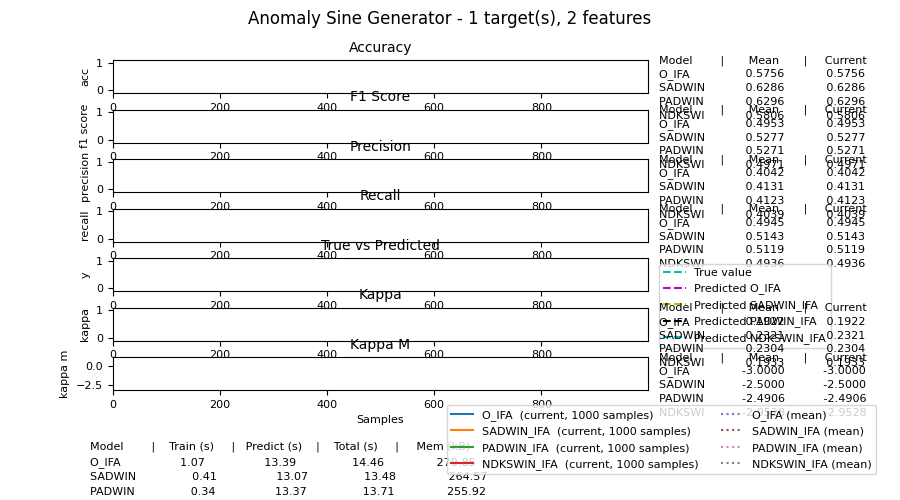

Prequential Evaluation
Evaluating 1 target(s).
Pre-training on 1 sample(s).
Evaluating...
 #------------------- [5%] [0.01s]

/Users/maurrastogbe/opt/anaconda3/lib/python3.7/site-packages/skmultiflow/visualization/evaluation_visualizer.py:340: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self.fig.tight_layout(rect=[0, .04, 1, 0.98], pad=2.6, w_pad=0.4, h_pad=1.0)



The model was updated by training a new iForest with the version : AnomalyRate
 ##------------------ [10%] [3.06s]
The model was updated by training a new iForest with the version : AnomalyRate

The model was updated by training a new iForest with the version : NDKSWIN


/Users/maurrastogbe/opt/anaconda3/lib/python3.7/site-packages/skmultiflow/drift_detection/adwin.py:372: RuntimeWarning: invalid value encountered in sqrt
  epsilon = np.sqrt(2 * m * v * dd) + 1. * 2 / 3 * dd * m


 ###----------------- [15%] [6.01s]
The model was updated by training a new iForest with the version : AnomalyRate

The model was updated by training a new iForest with the version : NDKSWIN
 ####---------------- [20%] [8.90s]
The model was updated by training a new iForest with the version : AnomalyRate

The model was updated by training a new iForest with the version : NDKSWIN
 #####--------------- [25%] [11.79s]
The model was updated by training a new iForest with the version : AnomalyRate

The model was updated by training a new iForest with the version : NDKSWIN
 ######-------------- [30%] [14.74s]
The model was updated by training a new iForest with the version : NDKSWIN
 #######------------- [35%] [17.57s]
The model was updated by training a new iForest with the version : AnomalyRate

The model was updated by training a new iForest with the version : NDKSWIN
 ########------------ [40%] [20.40s]
The model was updated by training a new iForest with the version : AnomalyRate

The m

<IPython.core.display.Javascript object>


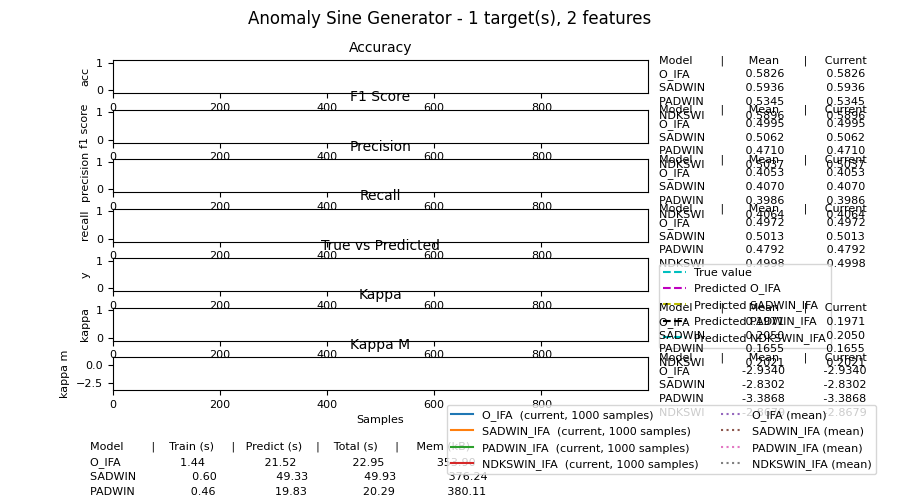

Prequential Evaluation
Evaluating 1 target(s).
Pre-training on 1 sample(s).
Evaluating...
 #------------------- [5%] [0.01s]

/Users/maurrastogbe/opt/anaconda3/lib/python3.7/site-packages/skmultiflow/visualization/evaluation_visualizer.py:340: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self.fig.tight_layout(rect=[0, .04, 1, 0.98], pad=2.6, w_pad=0.4, h_pad=1.0)



The model was updated by training a new iForest with the version : AnomalyRate
 ##------------------ [10%] [4.35s]
The model was updated by training a new iForest with the version : AnomalyRate

The model was updated by training a new iForest with the version : SADWIN


/Users/maurrastogbe/opt/anaconda3/lib/python3.7/site-packages/skmultiflow/drift_detection/adwin.py:372: RuntimeWarning: invalid value encountered in sqrt
  epsilon = np.sqrt(2 * m * v * dd) + 1. * 2 / 3 * dd * m


 ###----------------- [15%] [8.53s]
The model was updated by training a new iForest with the version : AnomalyRate
 ####---------------- [20%] [12.66s]
The model was updated by training a new iForest with the version : AnomalyRate

The model was updated by training a new iForest with the version : NDKSWIN
 #####--------------- [25%] [16.90s]
The model was updated by training a new iForest with the version : AnomalyRate

The model was updated by training a new iForest with the version : NDKSWIN
 ######-------------- [30%] [21.26s]
The model was updated by training a new iForest with the version : AnomalyRate

The model was updated by training a new iForest with the version : NDKSWIN
 #######------------- [35%] [25.51s]
The model was updated by training a new iForest with the version : AnomalyRate

The model was updated by training a new iForest with the version : NDKSWIN
 ########------------ [40%] [29.82s]
The model was updated by training a new iForest with the version : AnomalyRate



<IPython.core.display.Javascript object>


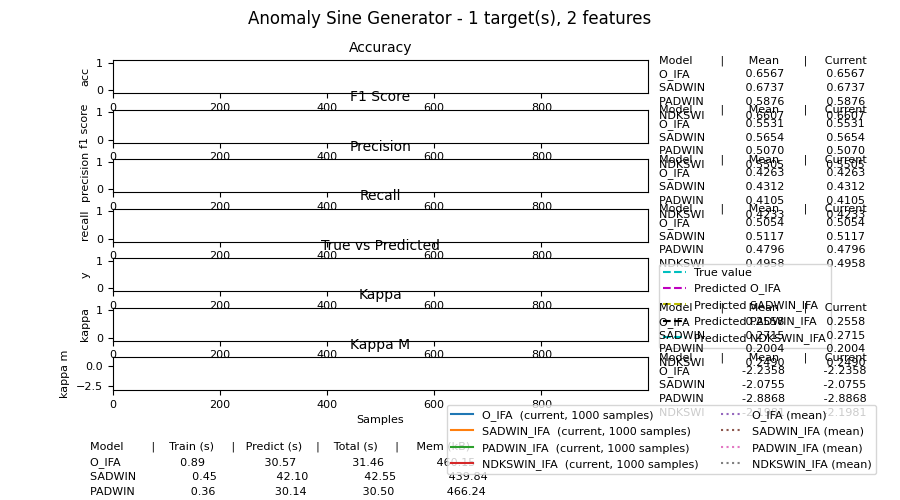

Prequential Evaluation
Evaluating 1 target(s).
Pre-training on 1 sample(s).
Evaluating...
 ##------------------ [10%] [0.02s]

/Users/maurrastogbe/opt/anaconda3/lib/python3.7/site-packages/skmultiflow/visualization/evaluation_visualizer.py:340: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self.fig.tight_layout(rect=[0, .04, 1, 0.98], pad=2.6, w_pad=0.4, h_pad=1.0)



The model was updated by training a new iForest with the version : AnomalyRate

The model was updated by training a new iForest with the version : SADWIN


/Users/maurrastogbe/opt/anaconda3/lib/python3.7/site-packages/skmultiflow/drift_detection/adwin.py:372: RuntimeWarning: invalid value encountered in sqrt
  epsilon = np.sqrt(2 * m * v * dd) + 1. * 2 / 3 * dd * m


 ####---------------- [20%] [26.19s]
The model was updated by training a new iForest with the version : AnomalyRate
 ######-------------- [30%] [42.28s]
The model was updated by training a new iForest with the version : AnomalyRate
 ########------------ [40%] [55.15s]
The model was updated by training a new iForest with the version : AnomalyRate
 ##########---------- [50%] [67.78s]
The model was updated by training a new iForest with the version : AnomalyRate
 ############-------- [60%] [82.91s]
The model was updated by training a new iForest with the version : AnomalyRate
 ##############------ [70%] [95.86s]
The model was updated by training a new iForest with the version : AnomalyRate
 ################---- [80%] [109.33s]
The model was updated by training a new iForest with the version : AnomalyRate
 ##################-- [90%] [122.35s]
The model was updated by training a new iForest with the version : AnomalyRate
 #################### [100%] [135.17s]
Processed samples: 1000
Mean pe

<IPython.core.display.Javascript object>


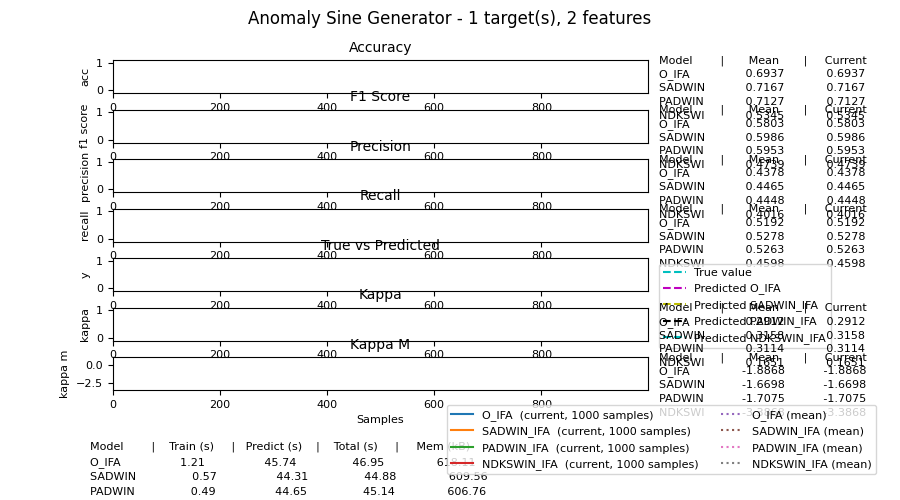

Prequential Evaluation
Evaluating 1 target(s).
Pre-training on 1 sample(s).
Evaluating...
 ##------------------ [10%] [0.02s]

/Users/maurrastogbe/opt/anaconda3/lib/python3.7/site-packages/skmultiflow/visualization/evaluation_visualizer.py:340: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self.fig.tight_layout(rect=[0, .04, 1, 0.98], pad=2.6, w_pad=0.4, h_pad=1.0)



The model was updated by training a new iForest with the version : AnomalyRate


/Users/maurrastogbe/opt/anaconda3/lib/python3.7/site-packages/skmultiflow/drift_detection/adwin.py:372: RuntimeWarning: invalid value encountered in sqrt
  epsilon = np.sqrt(2 * m * v * dd) + 1. * 2 / 3 * dd * m


 ####---------------- [20%] [25.96s]
The model was updated by training a new iForest with the version : AnomalyRate
 ######-------------- [30%] [46.63s]
The model was updated by training a new iForest with the version : AnomalyRate
 ########------------ [40%] [67.74s]
The model was updated by training a new iForest with the version : AnomalyRate
 ##########---------- [50%] [86.80s]
The model was updated by training a new iForest with the version : AnomalyRate
 ############-------- [60%] [105.22s]
The model was updated by training a new iForest with the version : AnomalyRate
 ##############------ [70%] [123.51s]
The model was updated by training a new iForest with the version : AnomalyRate
 ################---- [80%] [143.88s]
The model was updated by training a new iForest with the version : AnomalyRate
 ##################-- [90%] [162.35s]
The model was updated by training a new iForest with the version : AnomalyRate
 #################### [100%] [180.54s]
Processed samples: 1000
Mean 

<IPython.core.display.Javascript object>


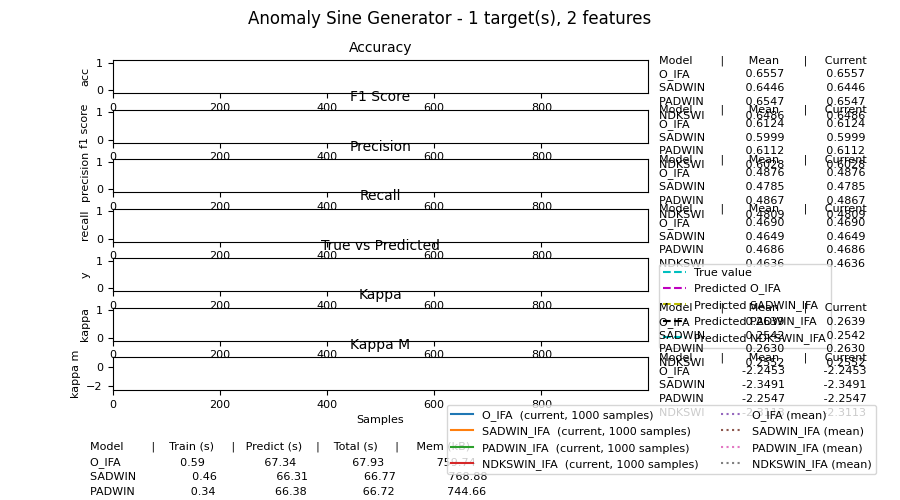

Prequential Evaluation
Evaluating 1 target(s).
Pre-training on 1 sample(s).
Evaluating...
 #####--------------- [25%] [0.05s]

/Users/maurrastogbe/opt/anaconda3/lib/python3.7/site-packages/skmultiflow/visualization/evaluation_visualizer.py:340: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self.fig.tight_layout(rect=[0, .04, 1, 0.98], pad=2.6, w_pad=0.4, h_pad=1.0)



The model was updated by training a new iForest with the version : AnomalyRate


/Users/maurrastogbe/opt/anaconda3/lib/python3.7/site-packages/skmultiflow/drift_detection/adwin.py:372: RuntimeWarning: invalid value encountered in sqrt
  epsilon = np.sqrt(2 * m * v * dd) + 1. * 2 / 3 * dd * m



The model was updated by training a new iForest with the version : SADWIN
 ##########---------- [50%] [90.77s]
The model was updated by training a new iForest with the version : AnomalyRate
 ###############----- [75%] [180.06s]
The model was updated by training a new iForest with the version : AnomalyRate
 #################### [100%] [268.57s]
Processed samples: 1000
Mean performance:
O_IFA - Accuracy     : 0.6557
O_IFA - Kappa        : 0.2639
O_IFA - Kappa M      : -2.2453
O_IFA - Precision: 0.4876
O_IFA - Recall: 0.4690
O_IFA - F1 score: 0.6124
O_IFA - Training time (s)  : 0.59
O_IFA - Testing time  (s)  : 67.34
O_IFA - Total time    (s)  : 67.93
O_IFA - Size (kB)          : 759.7432
SADWIN_IFA - Accuracy     : 0.6446
SADWIN_IFA - Kappa        : 0.2542
SADWIN_IFA - Kappa M      : -2.3491
SADWIN_IFA - Precision: 0.4785
SADWIN_IFA - Recall: 0.4649
SADWIN_IFA - F1 score: 0.5999
SADWIN_IFA - Training time (s)  : 0.46
SADWIN_IFA - Testing time  (s)  : 66.31
SADWIN_IFA - Total time    (s)

<IPython.core.display.Javascript object>


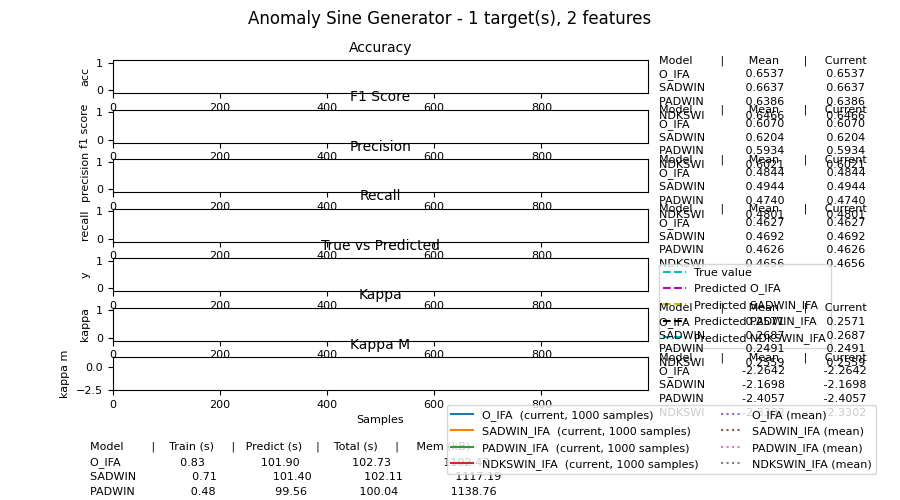

Prequential Evaluation
Evaluating 1 target(s).
Pre-training on 1 sample(s).
Evaluating...
 #####--------------- [25%] [0.05s]

/Users/maurrastogbe/opt/anaconda3/lib/python3.7/site-packages/skmultiflow/visualization/evaluation_visualizer.py:340: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self.fig.tight_layout(rect=[0, .04, 1, 0.98], pad=2.6, w_pad=0.4, h_pad=1.0)



The model was updated by training a new iForest with the version : AnomalyRate


/Users/maurrastogbe/opt/anaconda3/lib/python3.7/site-packages/skmultiflow/drift_detection/adwin.py:372: RuntimeWarning: invalid value encountered in sqrt
  epsilon = np.sqrt(2 * m * v * dd) + 1. * 2 / 3 * dd * m



The model was updated by training a new iForest with the version : SADWIN
 ##########---------- [50%] [145.02s]
The model was updated by training a new iForest with the version : AnomalyRate

The model was updated by training a new iForest with the version : SADWIN

The model was updated by training a new iForest with the version : NDKSWIN
 ###############----- [75%] [277.23s]
The model was updated by training a new iForest with the version : AnomalyRate

The model was updated by training a new iForest with the version : NDKSWIN
 #################### [100%] [407.87s]
Processed samples: 1000
Mean performance:
O_IFA - Accuracy     : 0.6537
O_IFA - Kappa        : 0.2571
O_IFA - Kappa M      : -2.2642
O_IFA - Precision: 0.4844
O_IFA - Recall: 0.4627
O_IFA - F1 score: 0.6070
O_IFA - Training time (s)  : 0.83
O_IFA - Testing time  (s)  : 101.90
O_IFA - Total time    (s)  : 102.73
O_IFA - Size (kB)          : 1102.4736
SADWIN_IFA - Accuracy     : 0.6637
SADWIN_IFA - Kappa        : 0.2687
SAD

In [8]:
dataset_name = "AnomalySineGenerator"
test_name = dataset_name+'_'+str(datetime.datetime.now())
drift_rate = 0.1
n_samples=10000
anomalies_percentage = 0.1
n_anomalies= int(n_samples*anomalies_percentage)
print(str(n_anomalies))
stream = func.get_anomalies_data_generated(n_samples=n_samples, n_anomalies=n_anomalies, contextual=False,
                 n_contextual=0.0, shift=4, noise=0.1, replace=True, random_state=None)

#func.save_stream_data_generated(stream=stream, window = window_save_size, result_folder=test_name, window_number = window_number)
execute_comparision()

## Applied On Simple ConceptDrift Stream Dataset

### When drift start one window and is in the window


******************************** Window = 50 and n_estimator = 20 ********************************
*************************************** Execution N° 0**********************************


<IPython.core.display.Javascript object>


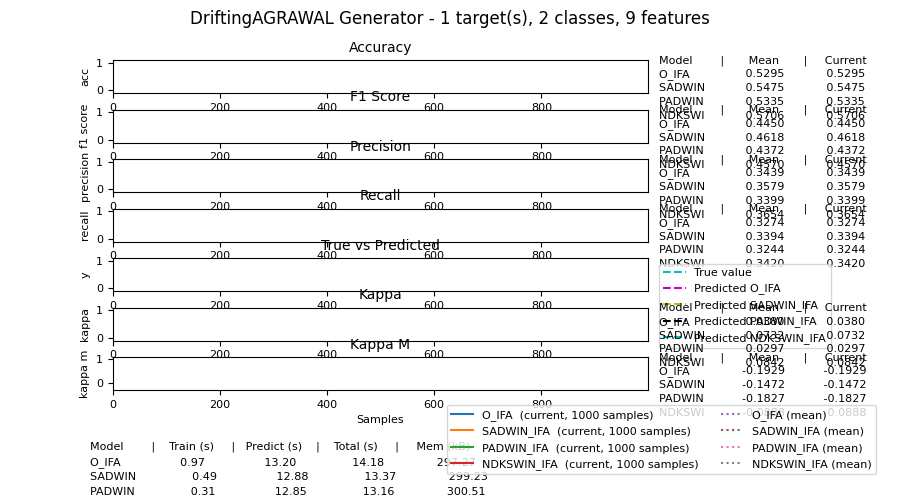

Prequential Evaluation
Evaluating 1 target(s).
Pre-training on 1 sample(s).
Evaluating...
 #------------------- [5%] [0.03s]

/Users/maurrastogbe/opt/anaconda3/lib/python3.7/site-packages/skmultiflow/visualization/evaluation_visualizer.py:340: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self.fig.tight_layout(rect=[0, .04, 1, 0.98], pad=2.6, w_pad=0.4, h_pad=1.0)



The model was updated by training a new iForest with the version : AnomalyRate
 ##------------------ [10%] [2.99s]
The model was updated by training a new iForest with the version : AnomalyRate

The model was updated by training a new iForest with the version : SADWIN


/Users/maurrastogbe/opt/anaconda3/lib/python3.7/site-packages/skmultiflow/drift_detection/adwin.py:372: RuntimeWarning: invalid value encountered in sqrt
  epsilon = np.sqrt(2 * m * v * dd) + 1. * 2 / 3 * dd * m


 ###----------------- [15%] [5.85s]
The model was updated by training a new iForest with the version : AnomalyRate
 ####---------------- [20%] [8.70s]
The model was updated by training a new iForest with the version : AnomalyRate

The model was updated by training a new iForest with the version : SADWIN
 #####--------------- [25%] [11.53s]
The model was updated by training a new iForest with the version : AnomalyRate
 ######-------------- [30%] [14.30s]
The model was updated by training a new iForest with the version : AnomalyRate

The model was updated by training a new iForest with the version : SADWIN
 #######------------- [35%] [17.15s]
The model was updated by training a new iForest with the version : AnomalyRate
 ########------------ [40%] [19.98s]
The model was updated by training a new iForest with the version : AnomalyRate

The model was updated by training a new iForest with the version : SADWIN
 #########----------- [45%] [22.80s]
The model was updated by training a new iFor

<IPython.core.display.Javascript object>


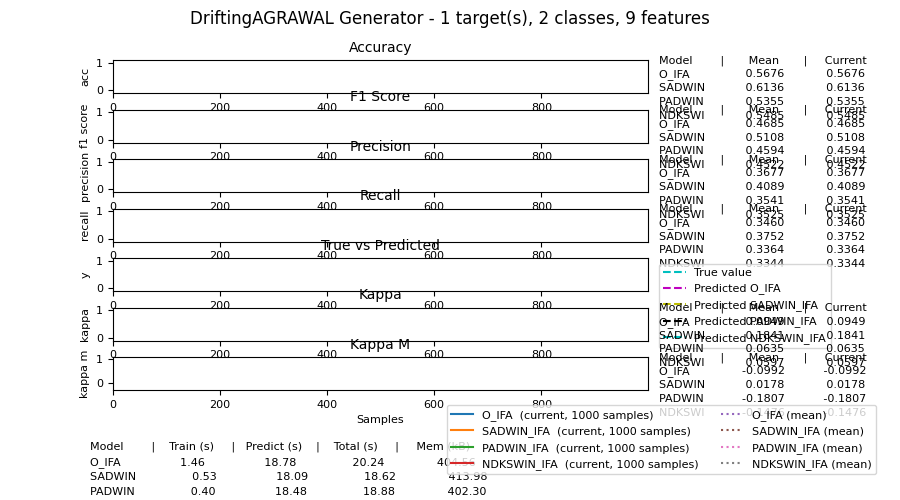

Prequential Evaluation
Evaluating 1 target(s).
Pre-training on 1 sample(s).
Evaluating...
 #------------------- [5%] [0.02s]

/Users/maurrastogbe/opt/anaconda3/lib/python3.7/site-packages/skmultiflow/visualization/evaluation_visualizer.py:340: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self.fig.tight_layout(rect=[0, .04, 1, 0.98], pad=2.6, w_pad=0.4, h_pad=1.0)



The model was updated by training a new iForest with the version : AnomalyRate
 ##------------------ [10%] [4.36s]
The model was updated by training a new iForest with the version : AnomalyRate

The model was updated by training a new iForest with the version : SADWIN


/Users/maurrastogbe/opt/anaconda3/lib/python3.7/site-packages/skmultiflow/drift_detection/adwin.py:372: RuntimeWarning: invalid value encountered in sqrt
  epsilon = np.sqrt(2 * m * v * dd) + 1. * 2 / 3 * dd * m


 ###----------------- [15%] [8.42s]
The model was updated by training a new iForest with the version : AnomalyRate
 ####---------------- [20%] [12.48s]
The model was updated by training a new iForest with the version : AnomalyRate

The model was updated by training a new iForest with the version : NDKSWIN
 #####--------------- [25%] [16.49s]
The model was updated by training a new iForest with the version : AnomalyRate

The model was updated by training a new iForest with the version : NDKSWIN
 ######-------------- [30%] [20.73s]
The model was updated by training a new iForest with the version : AnomalyRate

The model was updated by training a new iForest with the version : NDKSWIN
 #######------------- [35%] [24.82s]
The model was updated by training a new iForest with the version : AnomalyRate

The model was updated by training a new iForest with the version : NDKSWIN
 ########------------ [40%] [28.90s]
The model was updated by training a new iForest with the version : AnomalyRate



<IPython.core.display.Javascript object>


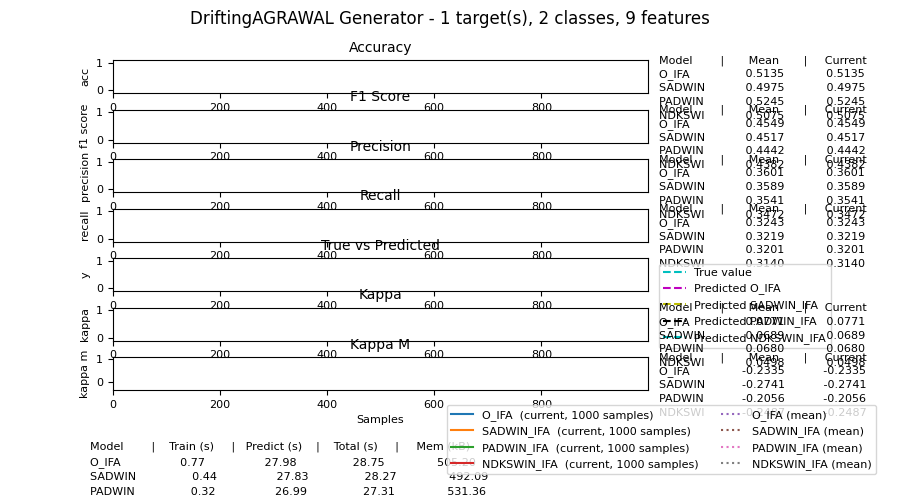

Prequential Evaluation
Evaluating 1 target(s).
Pre-training on 1 sample(s).
Evaluating...
 ##------------------ [10%] [0.04s]

/Users/maurrastogbe/opt/anaconda3/lib/python3.7/site-packages/skmultiflow/visualization/evaluation_visualizer.py:340: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self.fig.tight_layout(rect=[0, .04, 1, 0.98], pad=2.6, w_pad=0.4, h_pad=1.0)



The model was updated by training a new iForest with the version : AnomalyRate

The model was updated by training a new iForest with the version : SADWIN


/Users/maurrastogbe/opt/anaconda3/lib/python3.7/site-packages/skmultiflow/drift_detection/adwin.py:372: RuntimeWarning: invalid value encountered in sqrt
  epsilon = np.sqrt(2 * m * v * dd) + 1. * 2 / 3 * dd * m


 ####---------------- [20%] [12.79s]
The model was updated by training a new iForest with the version : AnomalyRate
 ######-------------- [30%] [25.06s]
The model was updated by training a new iForest with the version : AnomalyRate

The model was updated by training a new iForest with the version : NDKSWIN
 ########------------ [40%] [37.37s]
The model was updated by training a new iForest with the version : AnomalyRate

The model was updated by training a new iForest with the version : NDKSWIN
 ##########---------- [50%] [49.60s]
The model was updated by training a new iForest with the version : AnomalyRate

The model was updated by training a new iForest with the version : NDKSWIN
 ############-------- [60%] [63.48s]
The model was updated by training a new iForest with the version : AnomalyRate

The model was updated by training a new iForest with the version : NDKSWIN
 ##############------ [70%] [76.04s]
The model was updated by training a new iForest with the version : AnomalyRate


<IPython.core.display.Javascript object>


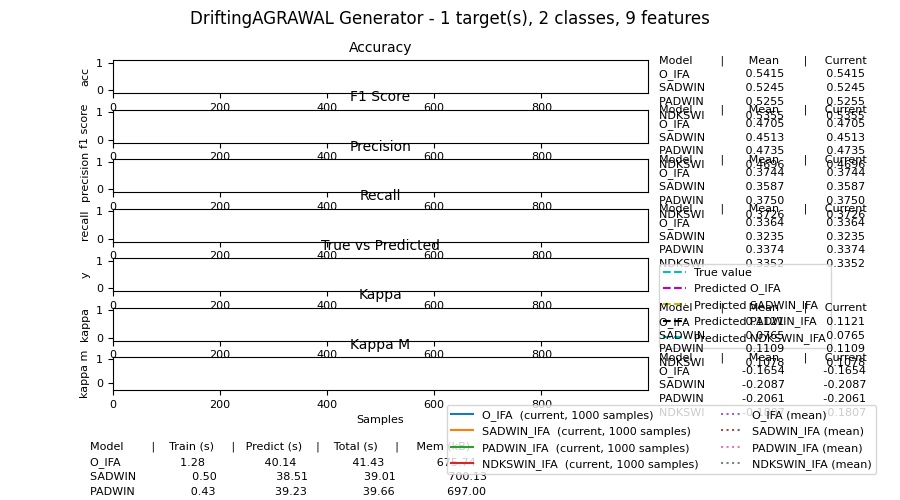

Prequential Evaluation
Evaluating 1 target(s).
Pre-training on 1 sample(s).
Evaluating...
 ##------------------ [10%] [0.04s]

/Users/maurrastogbe/opt/anaconda3/lib/python3.7/site-packages/skmultiflow/visualization/evaluation_visualizer.py:340: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self.fig.tight_layout(rect=[0, .04, 1, 0.98], pad=2.6, w_pad=0.4, h_pad=1.0)



The model was updated by training a new iForest with the version : AnomalyRate


/Users/maurrastogbe/opt/anaconda3/lib/python3.7/site-packages/skmultiflow/drift_detection/adwin.py:372: RuntimeWarning: invalid value encountered in sqrt
  epsilon = np.sqrt(2 * m * v * dd) + 1. * 2 / 3 * dd * m


 ####---------------- [20%] [18.42s]
The model was updated by training a new iForest with the version : AnomalyRate
 ######-------------- [30%] [36.12s]
The model was updated by training a new iForest with the version : AnomalyRate

The model was updated by training a new iForest with the version : NDKSWIN
 ########------------ [40%] [53.81s]
The model was updated by training a new iForest with the version : AnomalyRate

The model was updated by training a new iForest with the version : NDKSWIN
 ##########---------- [50%] [71.92s]
The model was updated by training a new iForest with the version : AnomalyRate

The model was updated by training a new iForest with the version : NDKSWIN
 ############-------- [60%] [89.84s]
The model was updated by training a new iForest with the version : AnomalyRate

The model was updated by training a new iForest with the version : NDKSWIN
 ##############------ [70%] [107.54s]
The model was updated by training a new iForest with the version : AnomalyRate

<IPython.core.display.Javascript object>


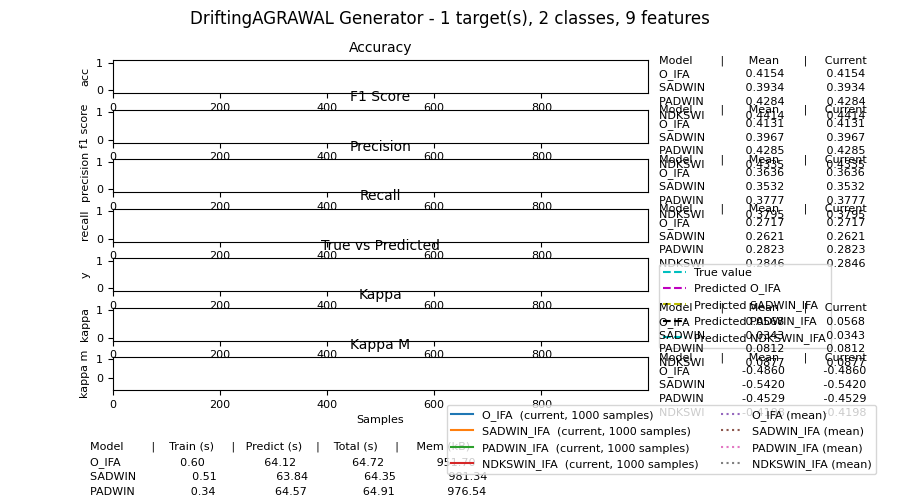

Prequential Evaluation
Evaluating 1 target(s).
Pre-training on 1 sample(s).
Evaluating...
 #####--------------- [25%] [0.11s]

/Users/maurrastogbe/opt/anaconda3/lib/python3.7/site-packages/skmultiflow/visualization/evaluation_visualizer.py:340: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self.fig.tight_layout(rect=[0, .04, 1, 0.98], pad=2.6, w_pad=0.4, h_pad=1.0)



The model was updated by training a new iForest with the version : AnomalyRate


/Users/maurrastogbe/opt/anaconda3/lib/python3.7/site-packages/skmultiflow/drift_detection/adwin.py:372: RuntimeWarning: invalid value encountered in sqrt
  epsilon = np.sqrt(2 * m * v * dd) + 1. * 2 / 3 * dd * m



The model was updated by training a new iForest with the version : SADWIN
 ##########---------- [50%] [87.61s]
The model was updated by training a new iForest with the version : AnomalyRate

The model was updated by training a new iForest with the version : SADWIN
 ###############----- [75%] [174.07s]
The model was updated by training a new iForest with the version : AnomalyRate
 #################### [100%] [258.45s]
Processed samples: 1000
Mean performance:
O_IFA - Accuracy     : 0.4154
O_IFA - Kappa        : 0.0568
O_IFA - Kappa M      : -0.4860
O_IFA - Precision: 0.3636
O_IFA - Recall: 0.2717
O_IFA - F1 score: 0.4131
O_IFA - Training time (s)  : 0.60
O_IFA - Testing time  (s)  : 64.12
O_IFA - Total time    (s)  : 64.72
O_IFA - Size (kB)          : 951.7041
SADWIN_IFA - Accuracy     : 0.3934
SADWIN_IFA - Kappa        : 0.0343
SADWIN_IFA - Kappa M      : -0.5420
SADWIN_IFA - Precision: 0.3532
SADWIN_IFA - Recall: 0.2621
SADWIN_IFA - F1 score: 0.3967
SADWIN_IFA - Training time (s)  : 

<IPython.core.display.Javascript object>


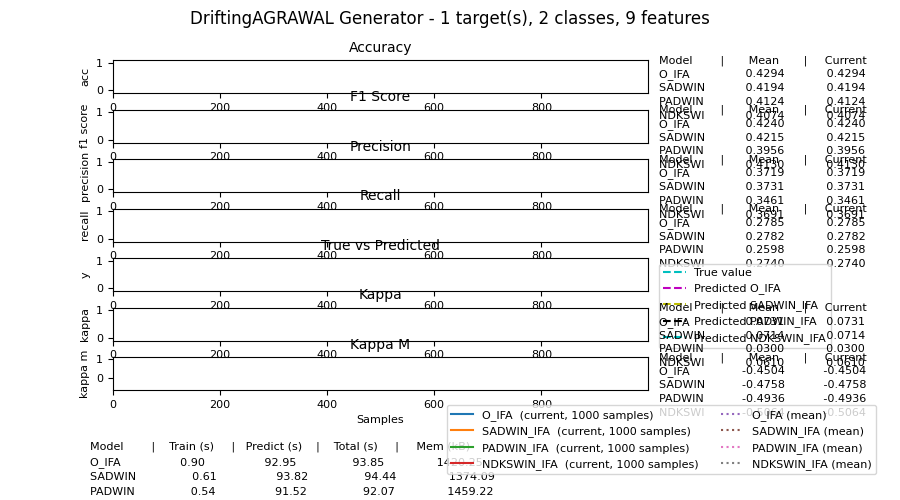

Prequential Evaluation
Evaluating 1 target(s).
Pre-training on 1 sample(s).
Evaluating...
 #####--------------- [25%] [0.19s]

/Users/maurrastogbe/opt/anaconda3/lib/python3.7/site-packages/skmultiflow/visualization/evaluation_visualizer.py:340: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self.fig.tight_layout(rect=[0, .04, 1, 0.98], pad=2.6, w_pad=0.4, h_pad=1.0)



The model was updated by training a new iForest with the version : AnomalyRate


/Users/maurrastogbe/opt/anaconda3/lib/python3.7/site-packages/skmultiflow/drift_detection/adwin.py:372: RuntimeWarning: invalid value encountered in sqrt
  epsilon = np.sqrt(2 * m * v * dd) + 1. * 2 / 3 * dd * m


 ##########---------- [50%] [127.05s]
The model was updated by training a new iForest with the version : AnomalyRate


/Users/maurrastogbe/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:5556: RuntimeWarning: ks_2samp: Exact calculation incurred large rounding error. Switching to mode=asymp
  RuntimeWarning)


 ###############----- [75%] [251.40s]
The model was updated by training a new iForest with the version : AnomalyRate
 #################### [100%] [374.92s]
Processed samples: 1000
Mean performance:
O_IFA - Accuracy     : 0.4294
O_IFA - Kappa        : 0.0731
O_IFA - Kappa M      : -0.4504
O_IFA - Precision: 0.3719
O_IFA - Recall: 0.2785
O_IFA - F1 score: 0.4240
O_IFA - Training time (s)  : 0.90
O_IFA - Testing time  (s)  : 92.95
O_IFA - Total time    (s)  : 93.85
O_IFA - Size (kB)          : 1420.2549
SADWIN_IFA - Accuracy     : 0.4194
SADWIN_IFA - Kappa        : 0.0714
SADWIN_IFA - Kappa M      : -0.4758
SADWIN_IFA - Precision: 0.3731
SADWIN_IFA - Recall: 0.2782
SADWIN_IFA - F1 score: 0.4215
SADWIN_IFA - Training time (s)  : 0.61
SADWIN_IFA - Testing time  (s)  : 93.82
SADWIN_IFA - Total time    (s)  : 94.44
SADWIN_IFA - Size (kB)          : 1374.0898
PADWIN_IFA - Accuracy     : 0.4124
PADWIN_IFA - Kappa        : 0.0300
PADWIN_IFA - Kappa M      : -0.4936
PADWIN_IFA - Precision: 0.3461

In [9]:
dataset_name = "DriftStreamGenerator"
test_name = dataset_name+'_'+str(datetime.datetime.now())
drift_rate = 0.0
stream = func.get_dataset(dataset_name=dataset_name, classification_function=0, noise_percentage=0.0, random_state=1,
                         drift_classification_function = 5, drift_random_state = 112, drift_noise_percentage = 0.0,
                          drift_start_position = 100, drift_width = 50, n_num_features = 2, n_cat_features = 0)

#func.save_stream_data_generated(stream=stream, window = window_save_size, result_folder=test_name, window_number=window_number)
execute_comparision()

## When drift is in one window and don't start the window


******************************** Window = 50 and n_estimator = 20 ********************************
*************************************** Execution N° 0**********************************


<IPython.core.display.Javascript object>


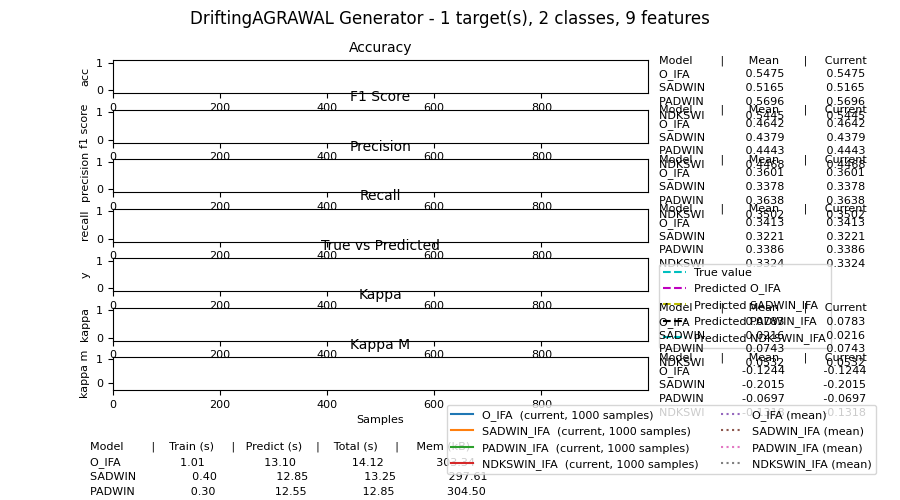

Prequential Evaluation
Evaluating 1 target(s).
Pre-training on 1 sample(s).
Evaluating...
 #------------------- [5%] [0.02s]

/Users/maurrastogbe/opt/anaconda3/lib/python3.7/site-packages/skmultiflow/visualization/evaluation_visualizer.py:340: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self.fig.tight_layout(rect=[0, .04, 1, 0.98], pad=2.6, w_pad=0.4, h_pad=1.0)



The model was updated by training a new iForest with the version : AnomalyRate
 ##------------------ [10%] [3.11s]
The model was updated by training a new iForest with the version : AnomalyRate

The model was updated by training a new iForest with the version : SADWIN

The model was updated by training a new iForest with the version : NDKSWIN


/Users/maurrastogbe/opt/anaconda3/lib/python3.7/site-packages/skmultiflow/drift_detection/adwin.py:372: RuntimeWarning: invalid value encountered in sqrt
  epsilon = np.sqrt(2 * m * v * dd) + 1. * 2 / 3 * dd * m


 ###----------------- [15%] [6.02s]
The model was updated by training a new iForest with the version : AnomalyRate

The model was updated by training a new iForest with the version : NDKSWIN
 ####---------------- [20%] [8.91s]
The model was updated by training a new iForest with the version : AnomalyRate

The model was updated by training a new iForest with the version : NDKSWIN
 #####--------------- [25%] [11.74s]
The model was updated by training a new iForest with the version : AnomalyRate

The model was updated by training a new iForest with the version : NDKSWIN
 ######-------------- [30%] [14.56s]
The model was updated by training a new iForest with the version : AnomalyRate

The model was updated by training a new iForest with the version : NDKSWIN
 #######------------- [35%] [17.42s]
The model was updated by training a new iForest with the version : AnomalyRate

The model was updated by training a new iForest with the version : NDKSWIN
 ########------------ [40%] [20.24s]
The m

<IPython.core.display.Javascript object>


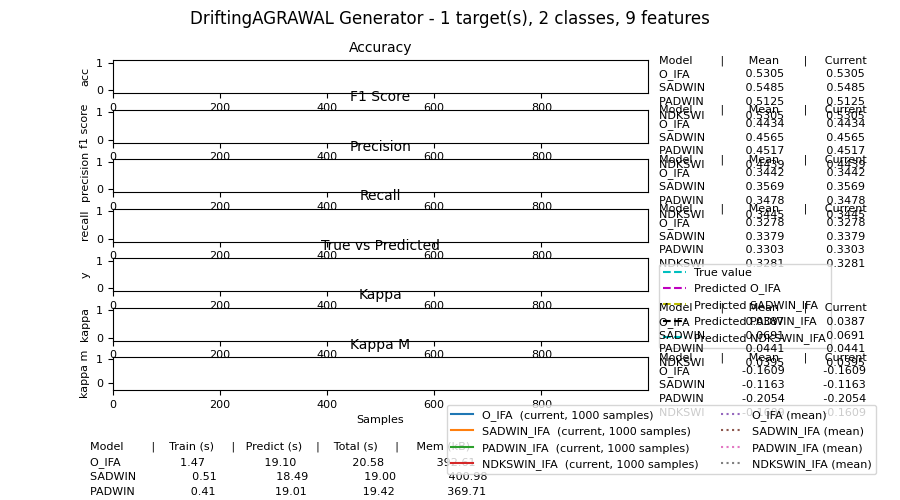

Prequential Evaluation
Evaluating 1 target(s).
Pre-training on 1 sample(s).
Evaluating...
 #------------------- [5%] [0.02s]

/Users/maurrastogbe/opt/anaconda3/lib/python3.7/site-packages/skmultiflow/visualization/evaluation_visualizer.py:340: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self.fig.tight_layout(rect=[0, .04, 1, 0.98], pad=2.6, w_pad=0.4, h_pad=1.0)



The model was updated by training a new iForest with the version : AnomalyRate
 ##------------------ [10%] [4.48s]
The model was updated by training a new iForest with the version : AnomalyRate

The model was updated by training a new iForest with the version : SADWIN

The model was updated by training a new iForest with the version : NDKSWIN


/Users/maurrastogbe/opt/anaconda3/lib/python3.7/site-packages/skmultiflow/drift_detection/adwin.py:372: RuntimeWarning: invalid value encountered in sqrt
  epsilon = np.sqrt(2 * m * v * dd) + 1. * 2 / 3 * dd * m


 ###----------------- [15%] [8.69s]
The model was updated by training a new iForest with the version : AnomalyRate

The model was updated by training a new iForest with the version : NDKSWIN
 ####---------------- [20%] [12.80s]
The model was updated by training a new iForest with the version : AnomalyRate

The model was updated by training a new iForest with the version : NDKSWIN
 #####--------------- [25%] [16.89s]
The model was updated by training a new iForest with the version : AnomalyRate

The model was updated by training a new iForest with the version : NDKSWIN
 ######-------------- [30%] [20.86s]
The model was updated by training a new iForest with the version : AnomalyRate

The model was updated by training a new iForest with the version : NDKSWIN
 #######------------- [35%] [24.92s]
The model was updated by training a new iForest with the version : AnomalyRate

The model was updated by training a new iForest with the version : NDKSWIN
 ########------------ [40%] [29.02s]
The 

/Users/maurrastogbe/opt/anaconda3/lib/python3.7/site-packages/skmultiflow/visualization/evaluation_visualizer.py:181: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  self.fig = plt.figure(figsize=(9, 5))


<IPython.core.display.Javascript object>


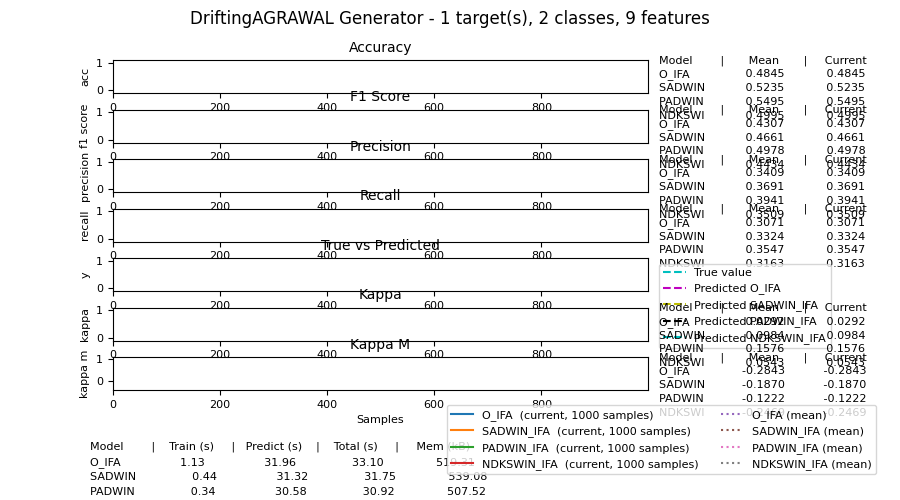

Prequential Evaluation
Evaluating 1 target(s).
Pre-training on 1 sample(s).
Evaluating...
 ##------------------ [10%] [0.05s]

/Users/maurrastogbe/opt/anaconda3/lib/python3.7/site-packages/skmultiflow/visualization/evaluation_visualizer.py:340: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self.fig.tight_layout(rect=[0, .04, 1, 0.98], pad=2.6, w_pad=0.4, h_pad=1.0)



The model was updated by training a new iForest with the version : AnomalyRate


/Users/maurrastogbe/opt/anaconda3/lib/python3.7/site-packages/skmultiflow/drift_detection/adwin.py:372: RuntimeWarning: invalid value encountered in sqrt
  epsilon = np.sqrt(2 * m * v * dd) + 1. * 2 / 3 * dd * m


 ####---------------- [20%] [14.67s]
The model was updated by training a new iForest with the version : AnomalyRate
 ######-------------- [30%] [29.27s]
The model was updated by training a new iForest with the version : AnomalyRate
 ########------------ [40%] [44.01s]
The model was updated by training a new iForest with the version : AnomalyRate
 ##########---------- [50%] [57.40s]
The model was updated by training a new iForest with the version : AnomalyRate

The model was updated by training a new iForest with the version : NDKSWIN
 ############-------- [60%] [71.34s]
The model was updated by training a new iForest with the version : AnomalyRate

The model was updated by training a new iForest with the version : NDKSWIN
 ##############------ [70%] [86.47s]
The model was updated by training a new iForest with the version : AnomalyRate

The model was updated by training a new iForest with the version : NDKSWIN
 ################---- [80%] [101.01s]
The model was updated by training a ne

<IPython.core.display.Javascript object>


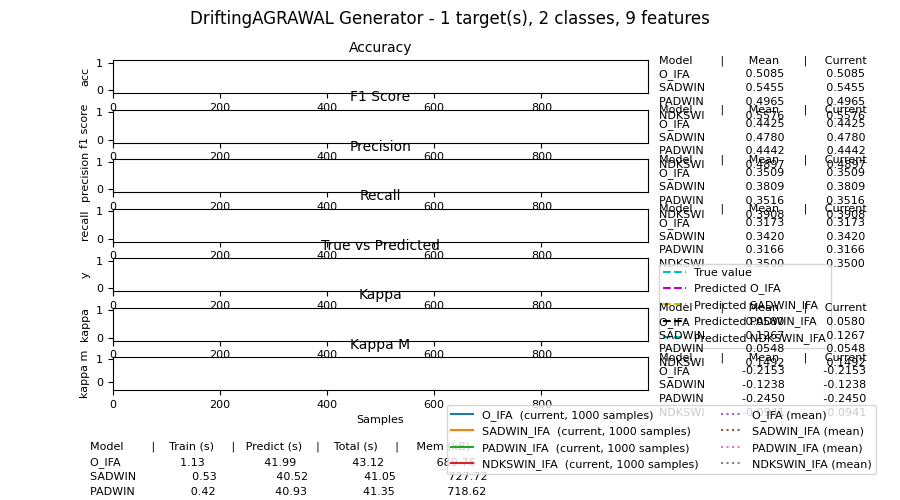

Prequential Evaluation
Evaluating 1 target(s).
Pre-training on 1 sample(s).
Evaluating...
 ##------------------ [10%] [0.04s]

/Users/maurrastogbe/opt/anaconda3/lib/python3.7/site-packages/skmultiflow/visualization/evaluation_visualizer.py:340: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self.fig.tight_layout(rect=[0, .04, 1, 0.98], pad=2.6, w_pad=0.4, h_pad=1.0)



The model was updated by training a new iForest with the version : AnomalyRate


/Users/maurrastogbe/opt/anaconda3/lib/python3.7/site-packages/skmultiflow/drift_detection/adwin.py:372: RuntimeWarning: invalid value encountered in sqrt
  epsilon = np.sqrt(2 * m * v * dd) + 1. * 2 / 3 * dd * m


 ####---------------- [20%] [19.04s]
The model was updated by training a new iForest with the version : AnomalyRate
 ######-------------- [30%] [37.26s]
The model was updated by training a new iForest with the version : AnomalyRate
 ########------------ [40%] [55.67s]
The model was updated by training a new iForest with the version : AnomalyRate
 ##########---------- [50%] [74.61s]
The model was updated by training a new iForest with the version : AnomalyRate
 ############-------- [60%] [92.89s]
The model was updated by training a new iForest with the version : AnomalyRate
 ##############------ [70%] [110.73s]
The model was updated by training a new iForest with the version : AnomalyRate
 ################---- [80%] [128.48s]
The model was updated by training a new iForest with the version : AnomalyRate
 ##################-- [90%] [147.13s]
The model was updated by training a new iForest with the version : AnomalyRate
 #################### [100%] [166.48s]
Processed samples: 1000
Mean p

<IPython.core.display.Javascript object>


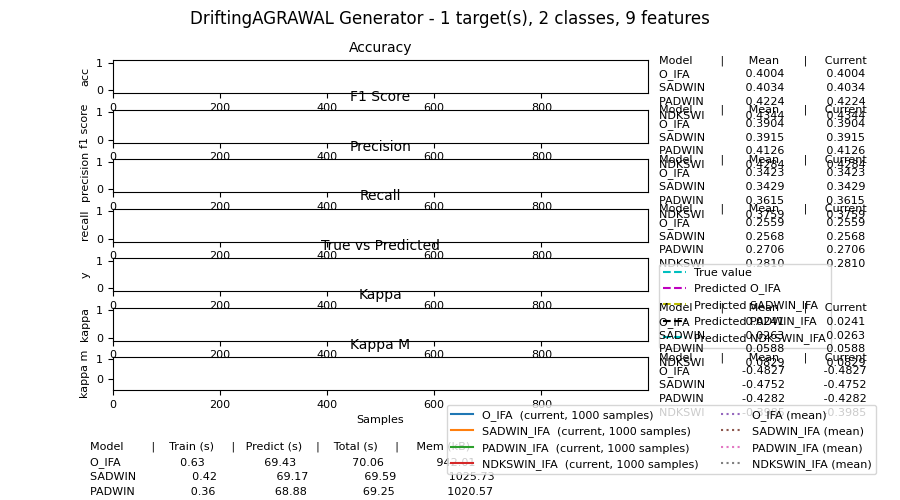

Prequential Evaluation
Evaluating 1 target(s).
Pre-training on 1 sample(s).
Evaluating...
 #####--------------- [25%] [0.12s]

/Users/maurrastogbe/opt/anaconda3/lib/python3.7/site-packages/skmultiflow/visualization/evaluation_visualizer.py:340: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self.fig.tight_layout(rect=[0, .04, 1, 0.98], pad=2.6, w_pad=0.4, h_pad=1.0)



The model was updated by training a new iForest with the version : AnomalyRate


/Users/maurrastogbe/opt/anaconda3/lib/python3.7/site-packages/skmultiflow/drift_detection/adwin.py:372: RuntimeWarning: invalid value encountered in sqrt
  epsilon = np.sqrt(2 * m * v * dd) + 1. * 2 / 3 * dd * m


 ##########---------- [50%] [92.85s]
The model was updated by training a new iForest with the version : AnomalyRate
 ###############----- [75%] [182.52s]
The model was updated by training a new iForest with the version : AnomalyRate
 #################### [100%] [275.82s]
Processed samples: 1000
Mean performance:
O_IFA - Accuracy     : 0.4004
O_IFA - Kappa        : 0.0241
O_IFA - Kappa M      : -0.4827
O_IFA - Precision: 0.3423
O_IFA - Recall: 0.2559
O_IFA - F1 score: 0.3904
O_IFA - Training time (s)  : 0.63
O_IFA - Testing time  (s)  : 69.43
O_IFA - Total time    (s)  : 70.06
O_IFA - Size (kB)          : 942.0127
SADWIN_IFA - Accuracy     : 0.4034
SADWIN_IFA - Kappa        : 0.0263
SADWIN_IFA - Kappa M      : -0.4752
SADWIN_IFA - Precision: 0.3429
SADWIN_IFA - Recall: 0.2568
SADWIN_IFA - F1 score: 0.3915
SADWIN_IFA - Training time (s)  : 0.42
SADWIN_IFA - Testing time  (s)  : 69.17
SADWIN_IFA - Total time    (s)  : 69.59
SADWIN_IFA - Size (kB)          : 1025.7266
PADWIN_IFA - Accuracy

<IPython.core.display.Javascript object>


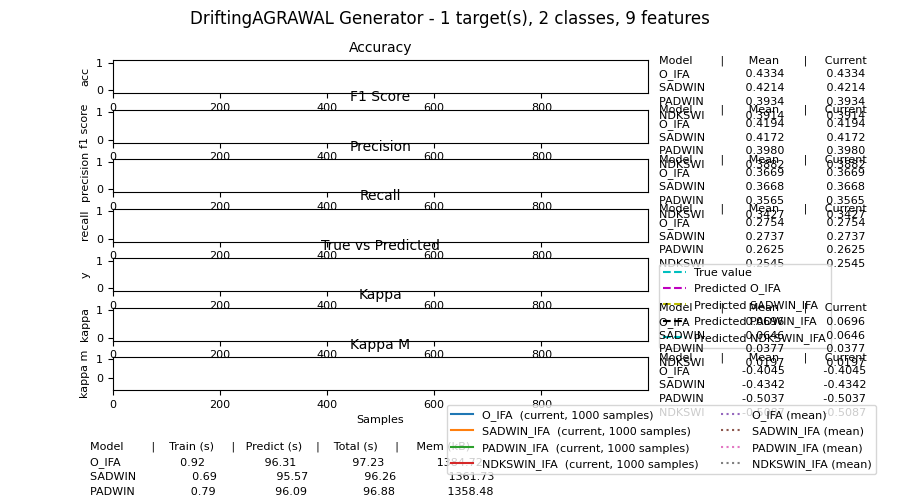

Prequential Evaluation
Evaluating 1 target(s).
Pre-training on 1 sample(s).
Evaluating...
 #####--------------- [25%] [0.13s]

/Users/maurrastogbe/opt/anaconda3/lib/python3.7/site-packages/skmultiflow/visualization/evaluation_visualizer.py:340: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self.fig.tight_layout(rect=[0, .04, 1, 0.98], pad=2.6, w_pad=0.4, h_pad=1.0)



The model was updated by training a new iForest with the version : AnomalyRate


/Users/maurrastogbe/opt/anaconda3/lib/python3.7/site-packages/skmultiflow/drift_detection/adwin.py:372: RuntimeWarning: invalid value encountered in sqrt
  epsilon = np.sqrt(2 * m * v * dd) + 1. * 2 / 3 * dd * m



The model was updated by training a new iForest with the version : SADWIN
 ##########---------- [50%] [135.27s]
The model was updated by training a new iForest with the version : AnomalyRate
 ###############----- [75%] [262.09s]
The model was updated by training a new iForest with the version : AnomalyRate

The model was updated by training a new iForest with the version : NDKSWIN
 #################### [100%] [387.90s]
Processed samples: 1000
Mean performance:
O_IFA - Accuracy     : 0.4334
O_IFA - Kappa        : 0.0696
O_IFA - Kappa M      : -0.4045
O_IFA - Precision: 0.3669
O_IFA - Recall: 0.2754
O_IFA - F1 score: 0.4194
O_IFA - Training time (s)  : 0.92
O_IFA - Testing time  (s)  : 96.31
O_IFA - Total time    (s)  : 97.23
O_IFA - Size (kB)          : 1384.7158
SADWIN_IFA - Accuracy     : 0.4214
SADWIN_IFA - Kappa        : 0.0646
SADWIN_IFA - Kappa M      : -0.4342
SADWIN_IFA - Precision: 0.3668
SADWIN_IFA - Recall: 0.2737
SADWIN_IFA - F1 score: 0.4172
SADWIN_IFA - Training time (s) 

In [10]:
dataset_name = "DriftStreamGenerator"
test_name = dataset_name+'_'+str(datetime.datetime.now())
drift_rate = 0.0
stream = func.get_dataset(dataset_name=dataset_name, classification_function=0, noise_percentage=0.0, random_state=1,
                         drift_classification_function = 3, drift_random_state = 112, drift_noise_percentage = 0.0,
                          drift_start_position = 110, drift_width = 50, n_num_features = 2, n_cat_features = 0)

#func.save_stream_data_generated(stream=stream, window = window_save_size, result_folder=test_name, window_number=window_number)
execute_comparision()

## When drift don't start a window but is between two windows


******************************** Window = 50 and n_estimator = 20 ********************************
*************************************** Execution N° 0**********************************


<IPython.core.display.Javascript object>


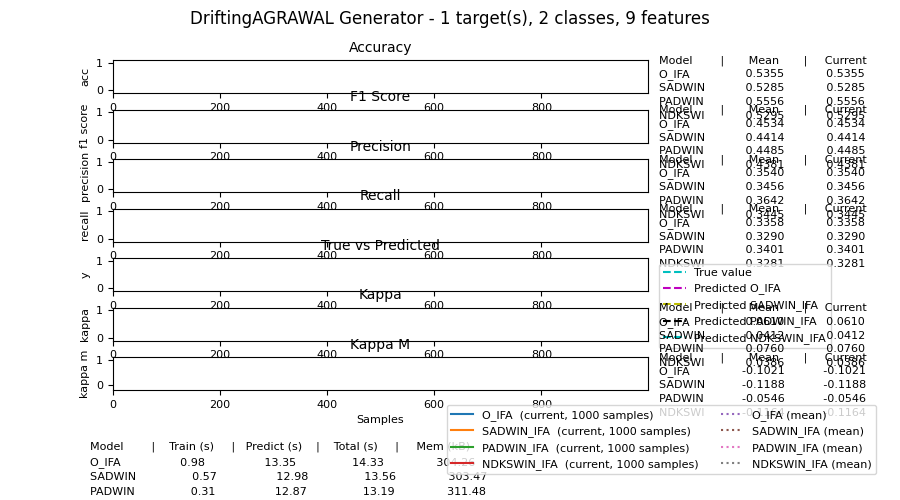

Prequential Evaluation
Evaluating 1 target(s).
Pre-training on 1 sample(s).
Evaluating...
 #------------------- [5%] [0.02s]

/Users/maurrastogbe/opt/anaconda3/lib/python3.7/site-packages/skmultiflow/visualization/evaluation_visualizer.py:340: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self.fig.tight_layout(rect=[0, .04, 1, 0.98], pad=2.6, w_pad=0.4, h_pad=1.0)



The model was updated by training a new iForest with the version : AnomalyRate
 ##------------------ [10%] [3.18s]
The model was updated by training a new iForest with the version : AnomalyRate

The model was updated by training a new iForest with the version : SADWIN


/Users/maurrastogbe/opt/anaconda3/lib/python3.7/site-packages/skmultiflow/drift_detection/adwin.py:372: RuntimeWarning: invalid value encountered in sqrt
  epsilon = np.sqrt(2 * m * v * dd) + 1. * 2 / 3 * dd * m


 ###----------------- [15%] [6.12s]
The model was updated by training a new iForest with the version : AnomalyRate
 ####---------------- [20%] [8.91s]
The model was updated by training a new iForest with the version : AnomalyRate

The model was updated by training a new iForest with the version : SADWIN
 #####--------------- [25%] [11.76s]
The model was updated by training a new iForest with the version : AnomalyRate
 ######-------------- [30%] [14.63s]
The model was updated by training a new iForest with the version : AnomalyRate

The model was updated by training a new iForest with the version : SADWIN
 #######------------- [35%] [17.39s]
The model was updated by training a new iForest with the version : AnomalyRate
 ########------------ [40%] [20.13s]
The model was updated by training a new iForest with the version : AnomalyRate

The model was updated by training a new iForest with the version : SADWIN
 #########----------- [45%] [23.00s]
The model was updated by training a new iFor

<IPython.core.display.Javascript object>


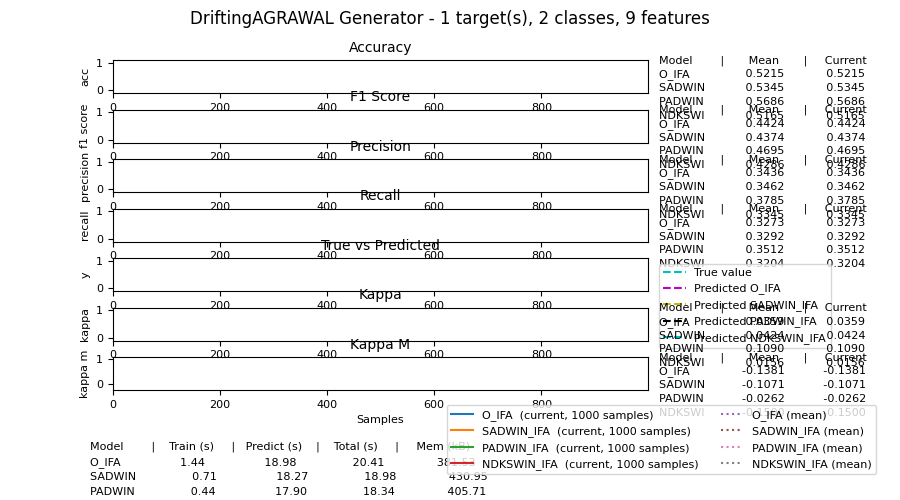

Prequential Evaluation
Evaluating 1 target(s).
Pre-training on 1 sample(s).
Evaluating...
 #------------------- [5%] [0.02s]

/Users/maurrastogbe/opt/anaconda3/lib/python3.7/site-packages/skmultiflow/visualization/evaluation_visualizer.py:340: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self.fig.tight_layout(rect=[0, .04, 1, 0.98], pad=2.6, w_pad=0.4, h_pad=1.0)



The model was updated by training a new iForest with the version : AnomalyRate
 ##------------------ [10%] [4.30s]
The model was updated by training a new iForest with the version : AnomalyRate

The model was updated by training a new iForest with the version : SADWIN

The model was updated by training a new iForest with the version : NDKSWIN


/Users/maurrastogbe/opt/anaconda3/lib/python3.7/site-packages/skmultiflow/drift_detection/adwin.py:372: RuntimeWarning: invalid value encountered in sqrt
  epsilon = np.sqrt(2 * m * v * dd) + 1. * 2 / 3 * dd * m


 ###----------------- [15%] [8.50s]
The model was updated by training a new iForest with the version : AnomalyRate

The model was updated by training a new iForest with the version : NDKSWIN
 ####---------------- [20%] [12.51s]
The model was updated by training a new iForest with the version : AnomalyRate

The model was updated by training a new iForest with the version : SADWIN

The model was updated by training a new iForest with the version : NDKSWIN
 #####--------------- [25%] [16.66s]
The model was updated by training a new iForest with the version : AnomalyRate

The model was updated by training a new iForest with the version : NDKSWIN
 ######-------------- [30%] [20.75s]
The model was updated by training a new iForest with the version : AnomalyRate

The model was updated by training a new iForest with the version : SADWIN

The model was updated by training a new iForest with the version : NDKSWIN
 #######------------- [35%] [24.94s]
The model was updated by training a new iFores

<IPython.core.display.Javascript object>


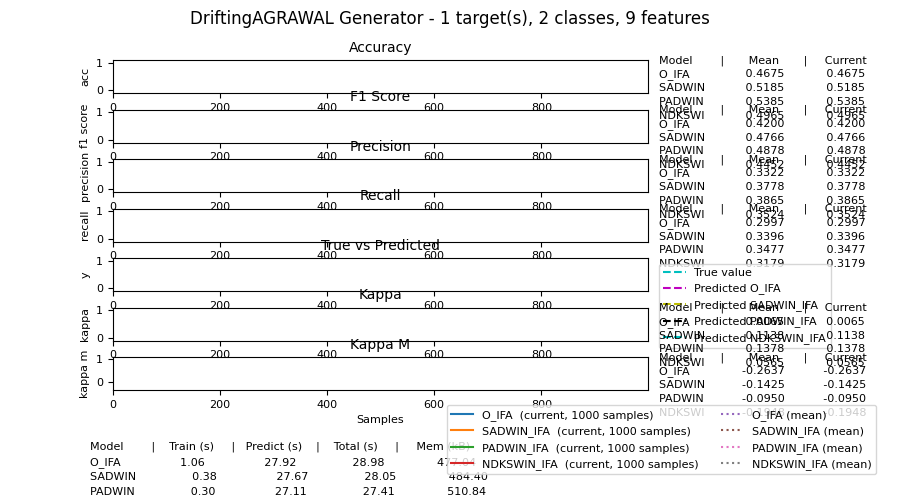

Prequential Evaluation
Evaluating 1 target(s).
Pre-training on 1 sample(s).
Evaluating...
 ##------------------ [10%] [0.04s]

/Users/maurrastogbe/opt/anaconda3/lib/python3.7/site-packages/skmultiflow/visualization/evaluation_visualizer.py:340: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self.fig.tight_layout(rect=[0, .04, 1, 0.98], pad=2.6, w_pad=0.4, h_pad=1.0)



The model was updated by training a new iForest with the version : AnomalyRate


/Users/maurrastogbe/opt/anaconda3/lib/python3.7/site-packages/skmultiflow/drift_detection/adwin.py:372: RuntimeWarning: invalid value encountered in sqrt
  epsilon = np.sqrt(2 * m * v * dd) + 1. * 2 / 3 * dd * m


 ####---------------- [20%] [12.75s]
The model was updated by training a new iForest with the version : AnomalyRate
 ######-------------- [30%] [25.11s]
The model was updated by training a new iForest with the version : AnomalyRate
 ########------------ [40%] [37.58s]
The model was updated by training a new iForest with the version : AnomalyRate


/Users/maurrastogbe/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:5556: RuntimeWarning: ks_2samp: Exact calculation incurred large rounding error. Switching to mode=asymp
  RuntimeWarning)


 ##########---------- [50%] [50.53s]
The model was updated by training a new iForest with the version : AnomalyRate

The model was updated by training a new iForest with the version : NDKSWIN
 ############-------- [60%] [63.05s]
The model was updated by training a new iForest with the version : AnomalyRate

The model was updated by training a new iForest with the version : NDKSWIN
 ##############------ [70%] [75.60s]
The model was updated by training a new iForest with the version : AnomalyRate

The model was updated by training a new iForest with the version : NDKSWIN
 ################---- [80%] [87.81s]
The model was updated by training a new iForest with the version : AnomalyRate

The model was updated by training a new iForest with the version : NDKSWIN
 ##################-- [90%] [100.23s]
The model was updated by training a new iForest with the version : AnomalyRate

The model was updated by training a new iForest with the version : NDKSWIN
 #################### [100%] [112.76s]


<IPython.core.display.Javascript object>


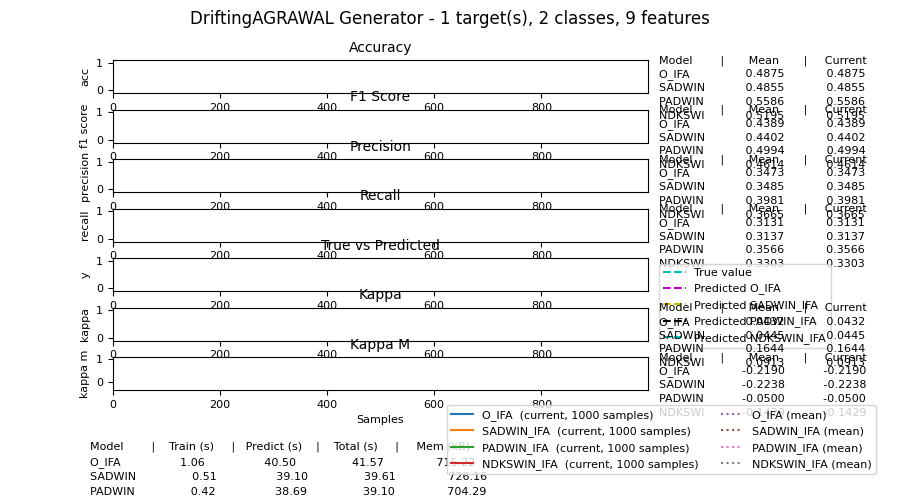

Prequential Evaluation
Evaluating 1 target(s).
Pre-training on 1 sample(s).
Evaluating...
 ##------------------ [10%] [0.04s]

/Users/maurrastogbe/opt/anaconda3/lib/python3.7/site-packages/skmultiflow/visualization/evaluation_visualizer.py:340: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self.fig.tight_layout(rect=[0, .04, 1, 0.98], pad=2.6, w_pad=0.4, h_pad=1.0)



The model was updated by training a new iForest with the version : AnomalyRate


/Users/maurrastogbe/opt/anaconda3/lib/python3.7/site-packages/skmultiflow/drift_detection/adwin.py:372: RuntimeWarning: invalid value encountered in sqrt
  epsilon = np.sqrt(2 * m * v * dd) + 1. * 2 / 3 * dd * m


 ####---------------- [20%] [18.39s]
The model was updated by training a new iForest with the version : AnomalyRate
 ######-------------- [30%] [36.10s]
The model was updated by training a new iForest with the version : AnomalyRate
 ########------------ [40%] [53.74s]
The model was updated by training a new iForest with the version : AnomalyRate
 ##########---------- [50%] [71.28s]
The model was updated by training a new iForest with the version : AnomalyRate
 ############-------- [60%] [88.84s]
The model was updated by training a new iForest with the version : AnomalyRate
 ##############------ [70%] [106.44s]
The model was updated by training a new iForest with the version : AnomalyRate
 ################---- [80%] [124.30s]
The model was updated by training a new iForest with the version : AnomalyRate
 ##################-- [90%] [142.22s]
The model was updated by training a new iForest with the version : AnomalyRate
 #################### [100%] [160.08s]
Processed samples: 1000
Mean p

<IPython.core.display.Javascript object>


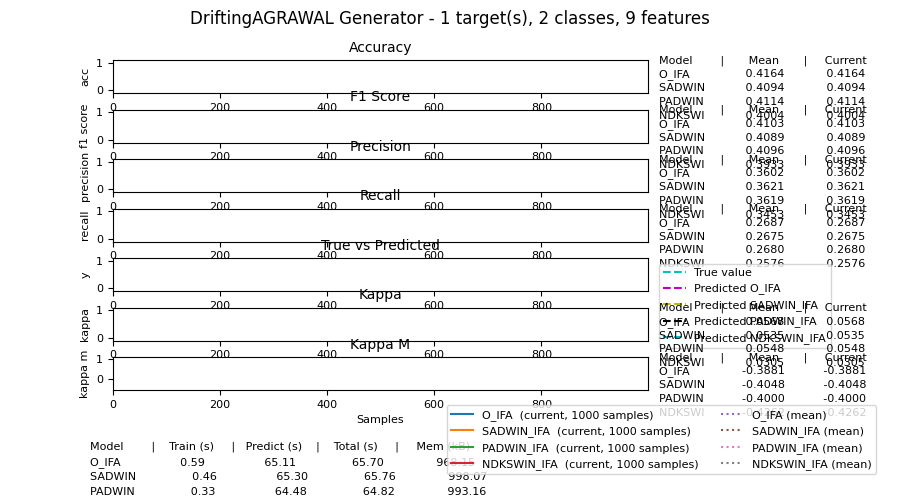

Prequential Evaluation
Evaluating 1 target(s).
Pre-training on 1 sample(s).
Evaluating...
 #####--------------- [25%] [0.11s]

/Users/maurrastogbe/opt/anaconda3/lib/python3.7/site-packages/skmultiflow/visualization/evaluation_visualizer.py:340: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self.fig.tight_layout(rect=[0, .04, 1, 0.98], pad=2.6, w_pad=0.4, h_pad=1.0)



The model was updated by training a new iForest with the version : AnomalyRate


/Users/maurrastogbe/opt/anaconda3/lib/python3.7/site-packages/skmultiflow/drift_detection/adwin.py:372: RuntimeWarning: invalid value encountered in sqrt
  epsilon = np.sqrt(2 * m * v * dd) + 1. * 2 / 3 * dd * m



The model was updated by training a new iForest with the version : SADWIN
 ##########---------- [50%] [88.37s]
The model was updated by training a new iForest with the version : AnomalyRate

The model was updated by training a new iForest with the version : NDKSWIN
 ###############----- [75%] [175.07s]
The model was updated by training a new iForest with the version : AnomalyRate

The model was updated by training a new iForest with the version : NDKSWIN
 #################### [100%] [261.93s]
Processed samples: 1000
Mean performance:
O_IFA - Accuracy     : 0.4164
O_IFA - Kappa        : 0.0568
O_IFA - Kappa M      : -0.3881
O_IFA - Precision: 0.3602
O_IFA - Recall: 0.2687
O_IFA - F1 score: 0.4103
O_IFA - Training time (s)  : 0.59
O_IFA - Testing time  (s)  : 65.11
O_IFA - Total time    (s)  : 65.70
O_IFA - Size (kB)          : 968.1533
SADWIN_IFA - Accuracy     : 0.4094
SADWIN_IFA - Kappa        : 0.0535
SADWIN_IFA - Kappa M      : -0.4048
SADWIN_IFA - Precision: 0.3621
SADWIN_IFA - Re

<IPython.core.display.Javascript object>


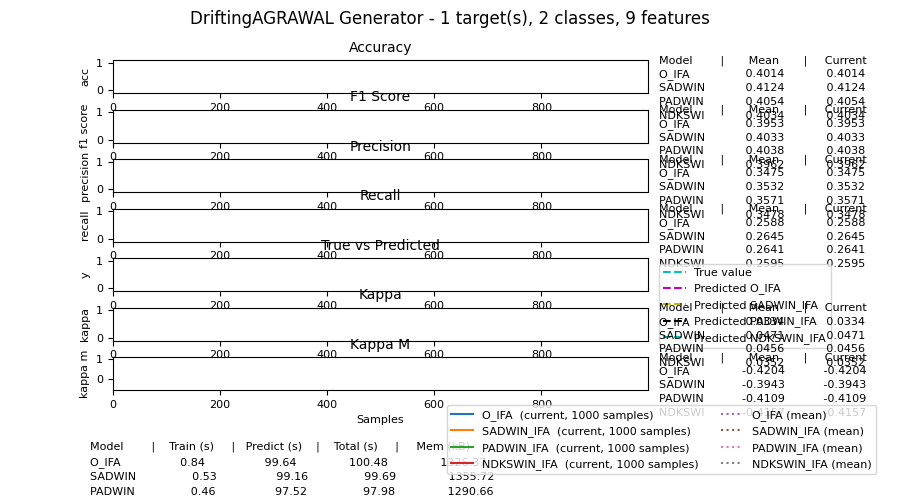

Prequential Evaluation
Evaluating 1 target(s).
Pre-training on 1 sample(s).
Evaluating...
 #####--------------- [25%] [0.11s]

/Users/maurrastogbe/opt/anaconda3/lib/python3.7/site-packages/skmultiflow/visualization/evaluation_visualizer.py:340: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self.fig.tight_layout(rect=[0, .04, 1, 0.98], pad=2.6, w_pad=0.4, h_pad=1.0)



The model was updated by training a new iForest with the version : AnomalyRate


/Users/maurrastogbe/opt/anaconda3/lib/python3.7/site-packages/skmultiflow/drift_detection/adwin.py:372: RuntimeWarning: invalid value encountered in sqrt
  epsilon = np.sqrt(2 * m * v * dd) + 1. * 2 / 3 * dd * m


 ##########---------- [50%] [128.34s]
The model was updated by training a new iForest with the version : AnomalyRate

The model was updated by training a new iForest with the version : NDKSWIN
 ###############----- [75%] [258.04s]
The model was updated by training a new iForest with the version : AnomalyRate

The model was updated by training a new iForest with the version : NDKSWIN
 #################### [100%] [398.48s]
Processed samples: 1000
Mean performance:
O_IFA - Accuracy     : 0.4014
O_IFA - Kappa        : 0.0334
O_IFA - Kappa M      : -0.4204
O_IFA - Precision: 0.3475
O_IFA - Recall: 0.2588
O_IFA - F1 score: 0.3953
O_IFA - Training time (s)  : 0.84
O_IFA - Testing time  (s)  : 99.64
O_IFA - Total time    (s)  : 100.48
O_IFA - Size (kB)          : 1326.3721
SADWIN_IFA - Accuracy     : 0.4124
SADWIN_IFA - Kappa        : 0.0471
SADWIN_IFA - Kappa M      : -0.3943
SADWIN_IFA - Precision: 0.3532
SADWIN_IFA - Recall: 0.2645
SADWIN_IFA - F1 score: 0.4033
SADWIN_IFA - Training time (s

In [11]:
dataset_name = "DriftStreamGenerator"
test_name = dataset_name+'_'+str(datetime.datetime.now())
drift_rate = 0.0
stream = func.get_dataset(dataset_name=dataset_name, classification_function=0, noise_percentage=0.0, random_state=1,
                         drift_classification_function = 3, drift_random_state = 112, drift_noise_percentage = 0.0,
                          drift_start_position = 175, drift_width = 50, n_num_features = 2, n_cat_features = 0)

#func.save_stream_data_generated(stream=stream, window = window_save_size, result_folder=test_name, window_number=window_number)
execute_comparision()